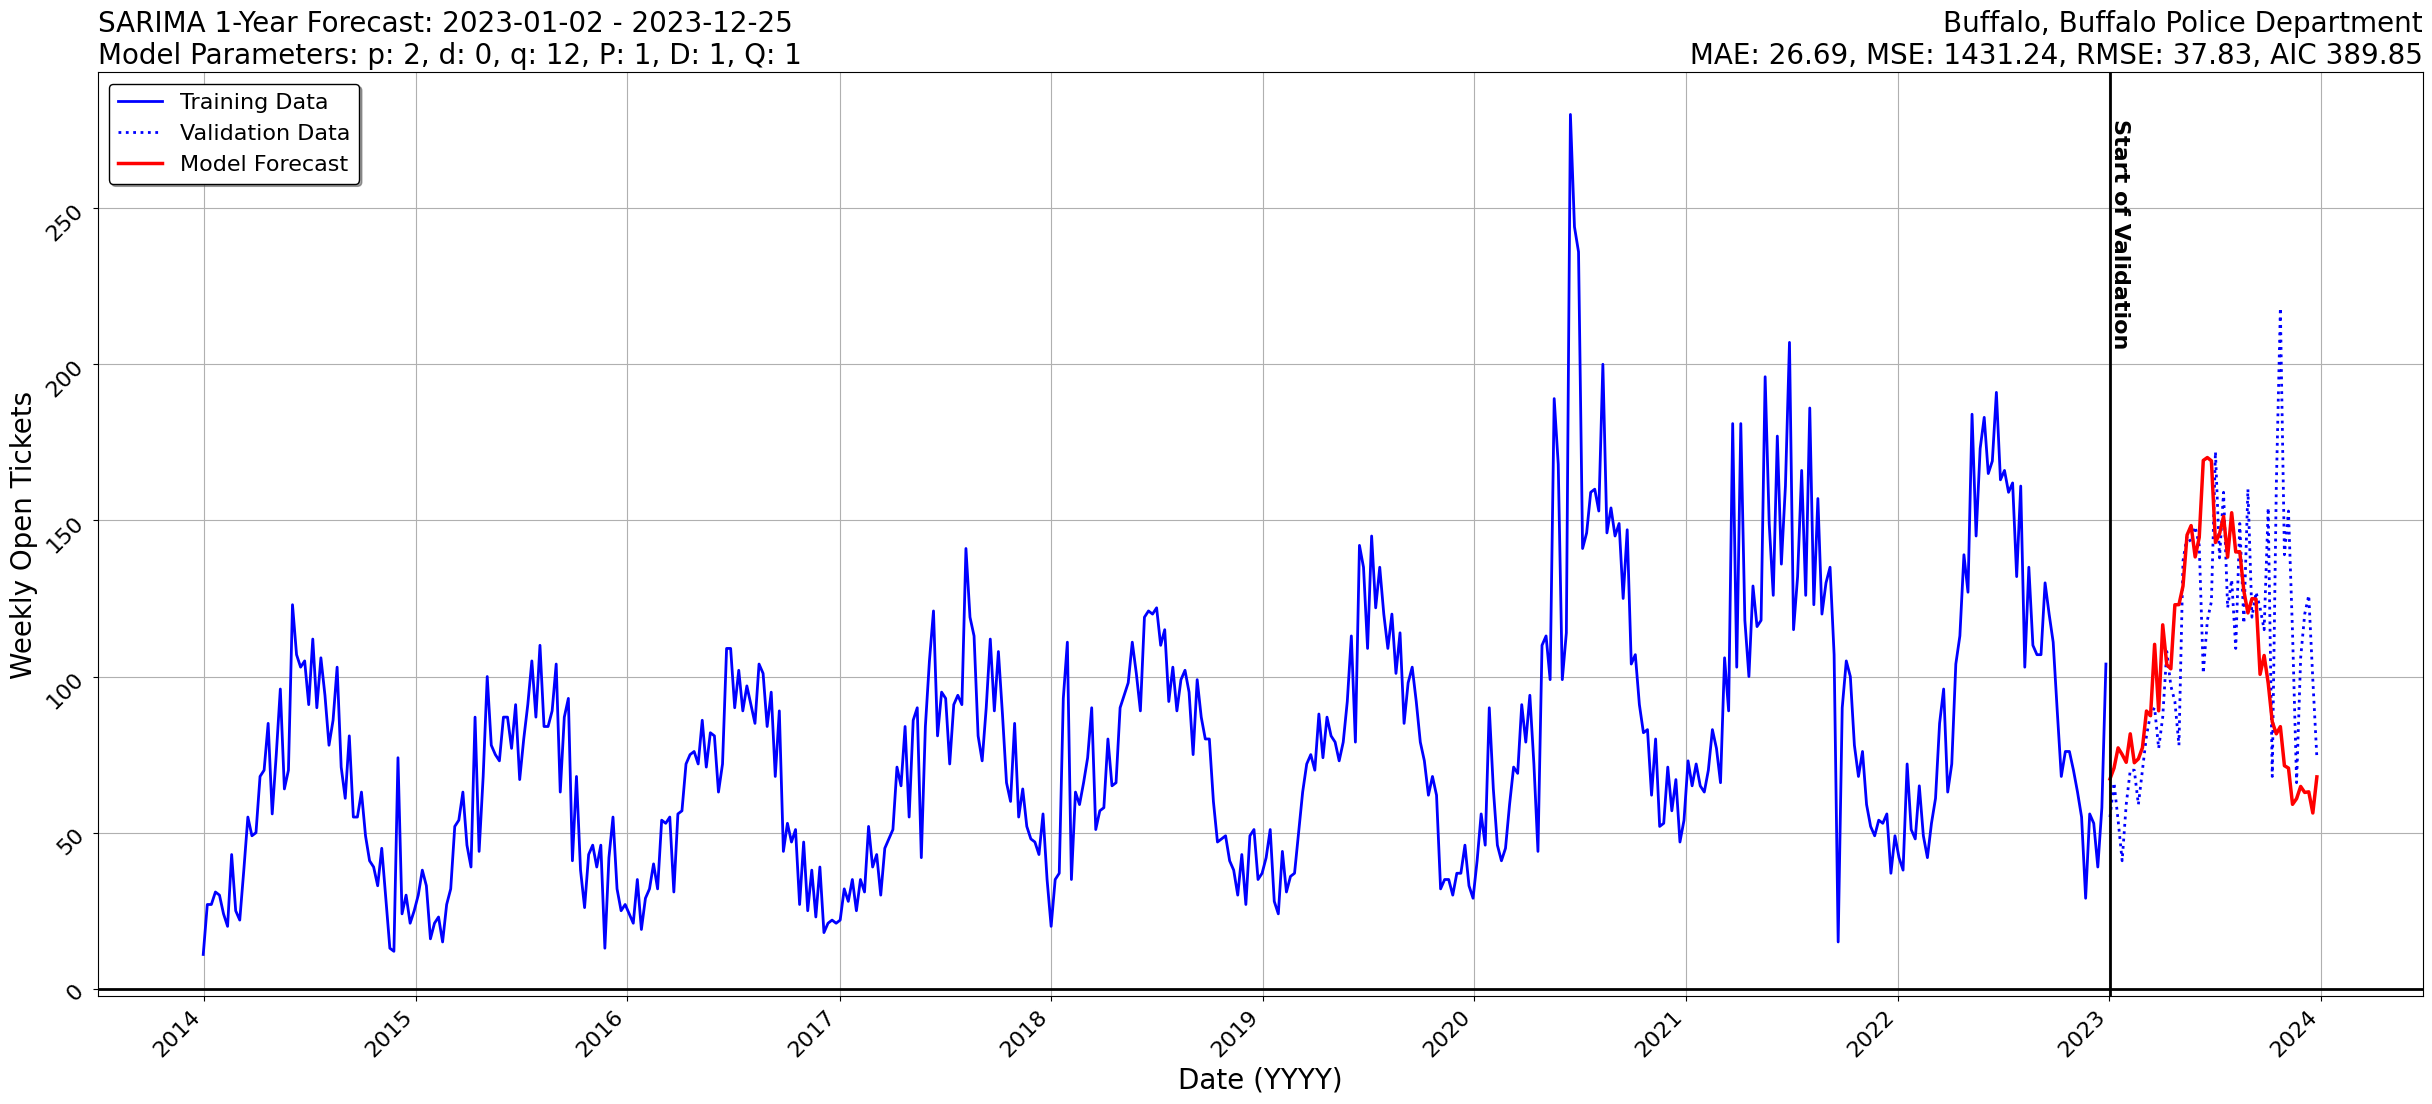

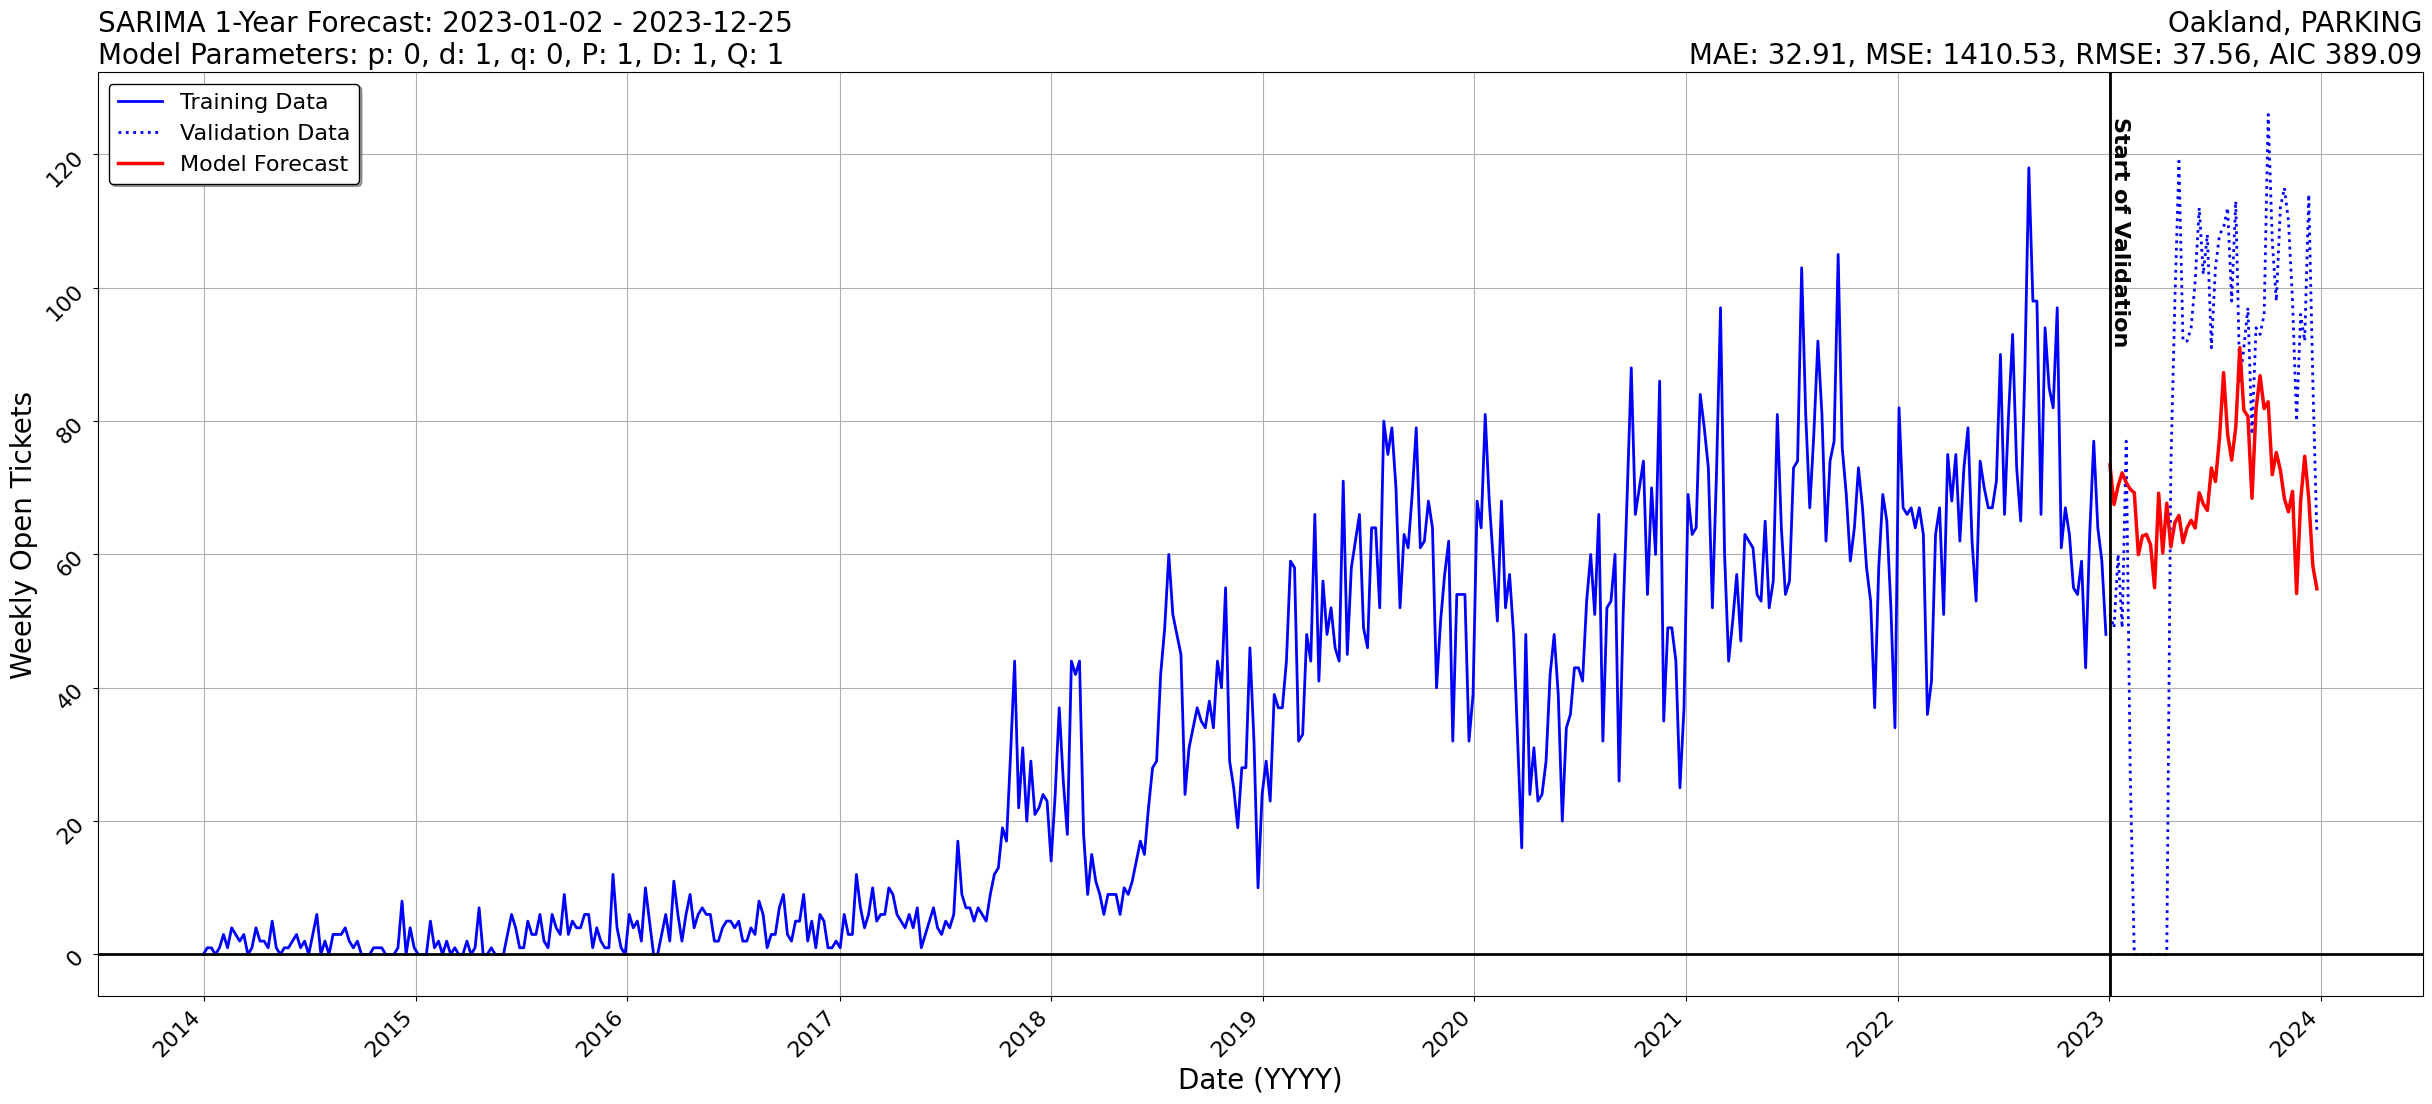

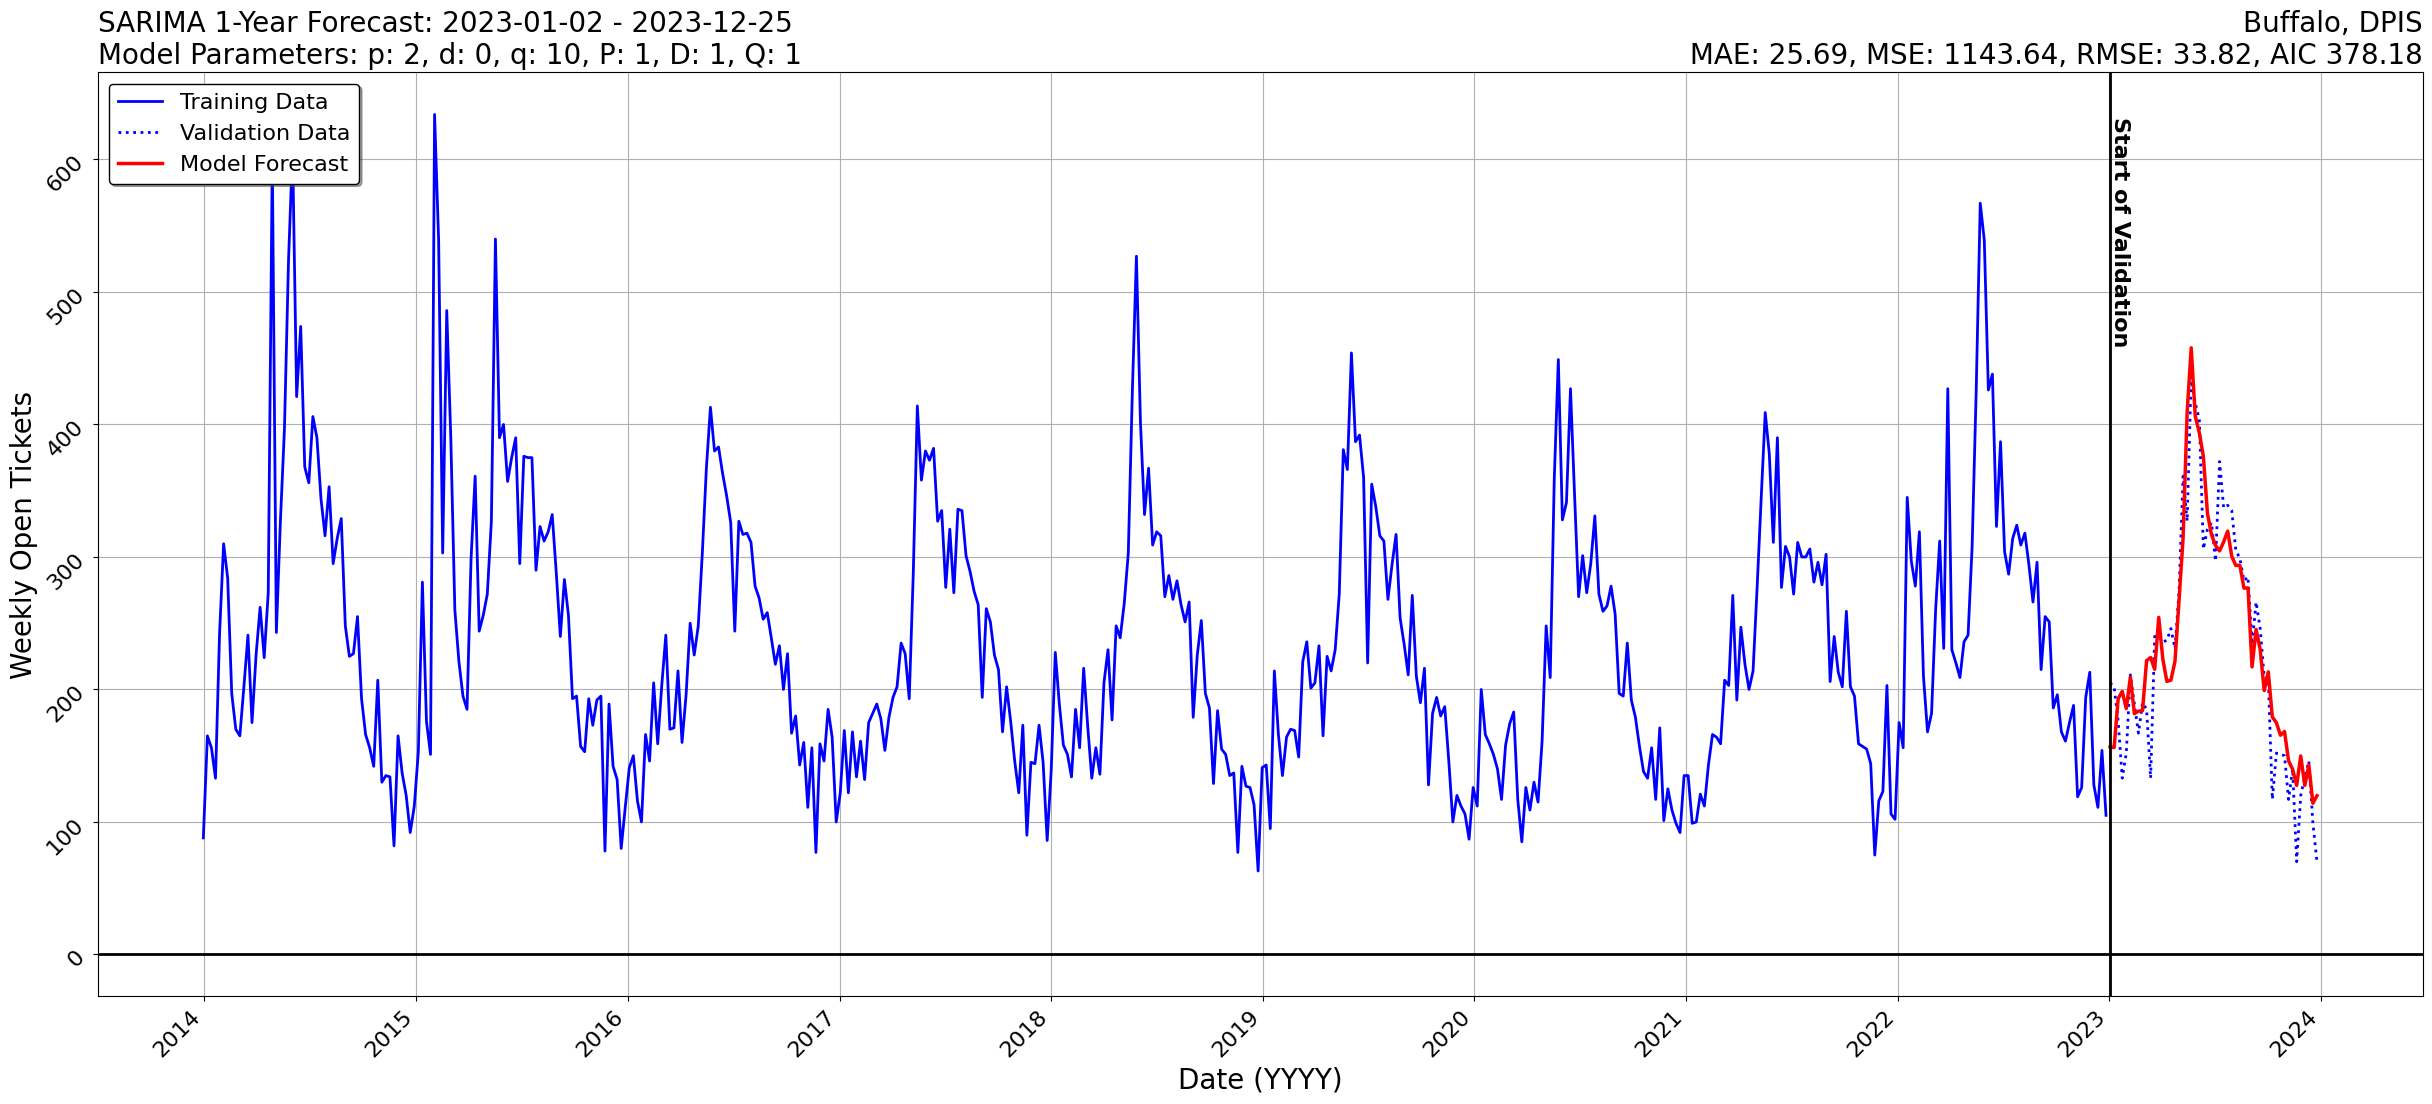

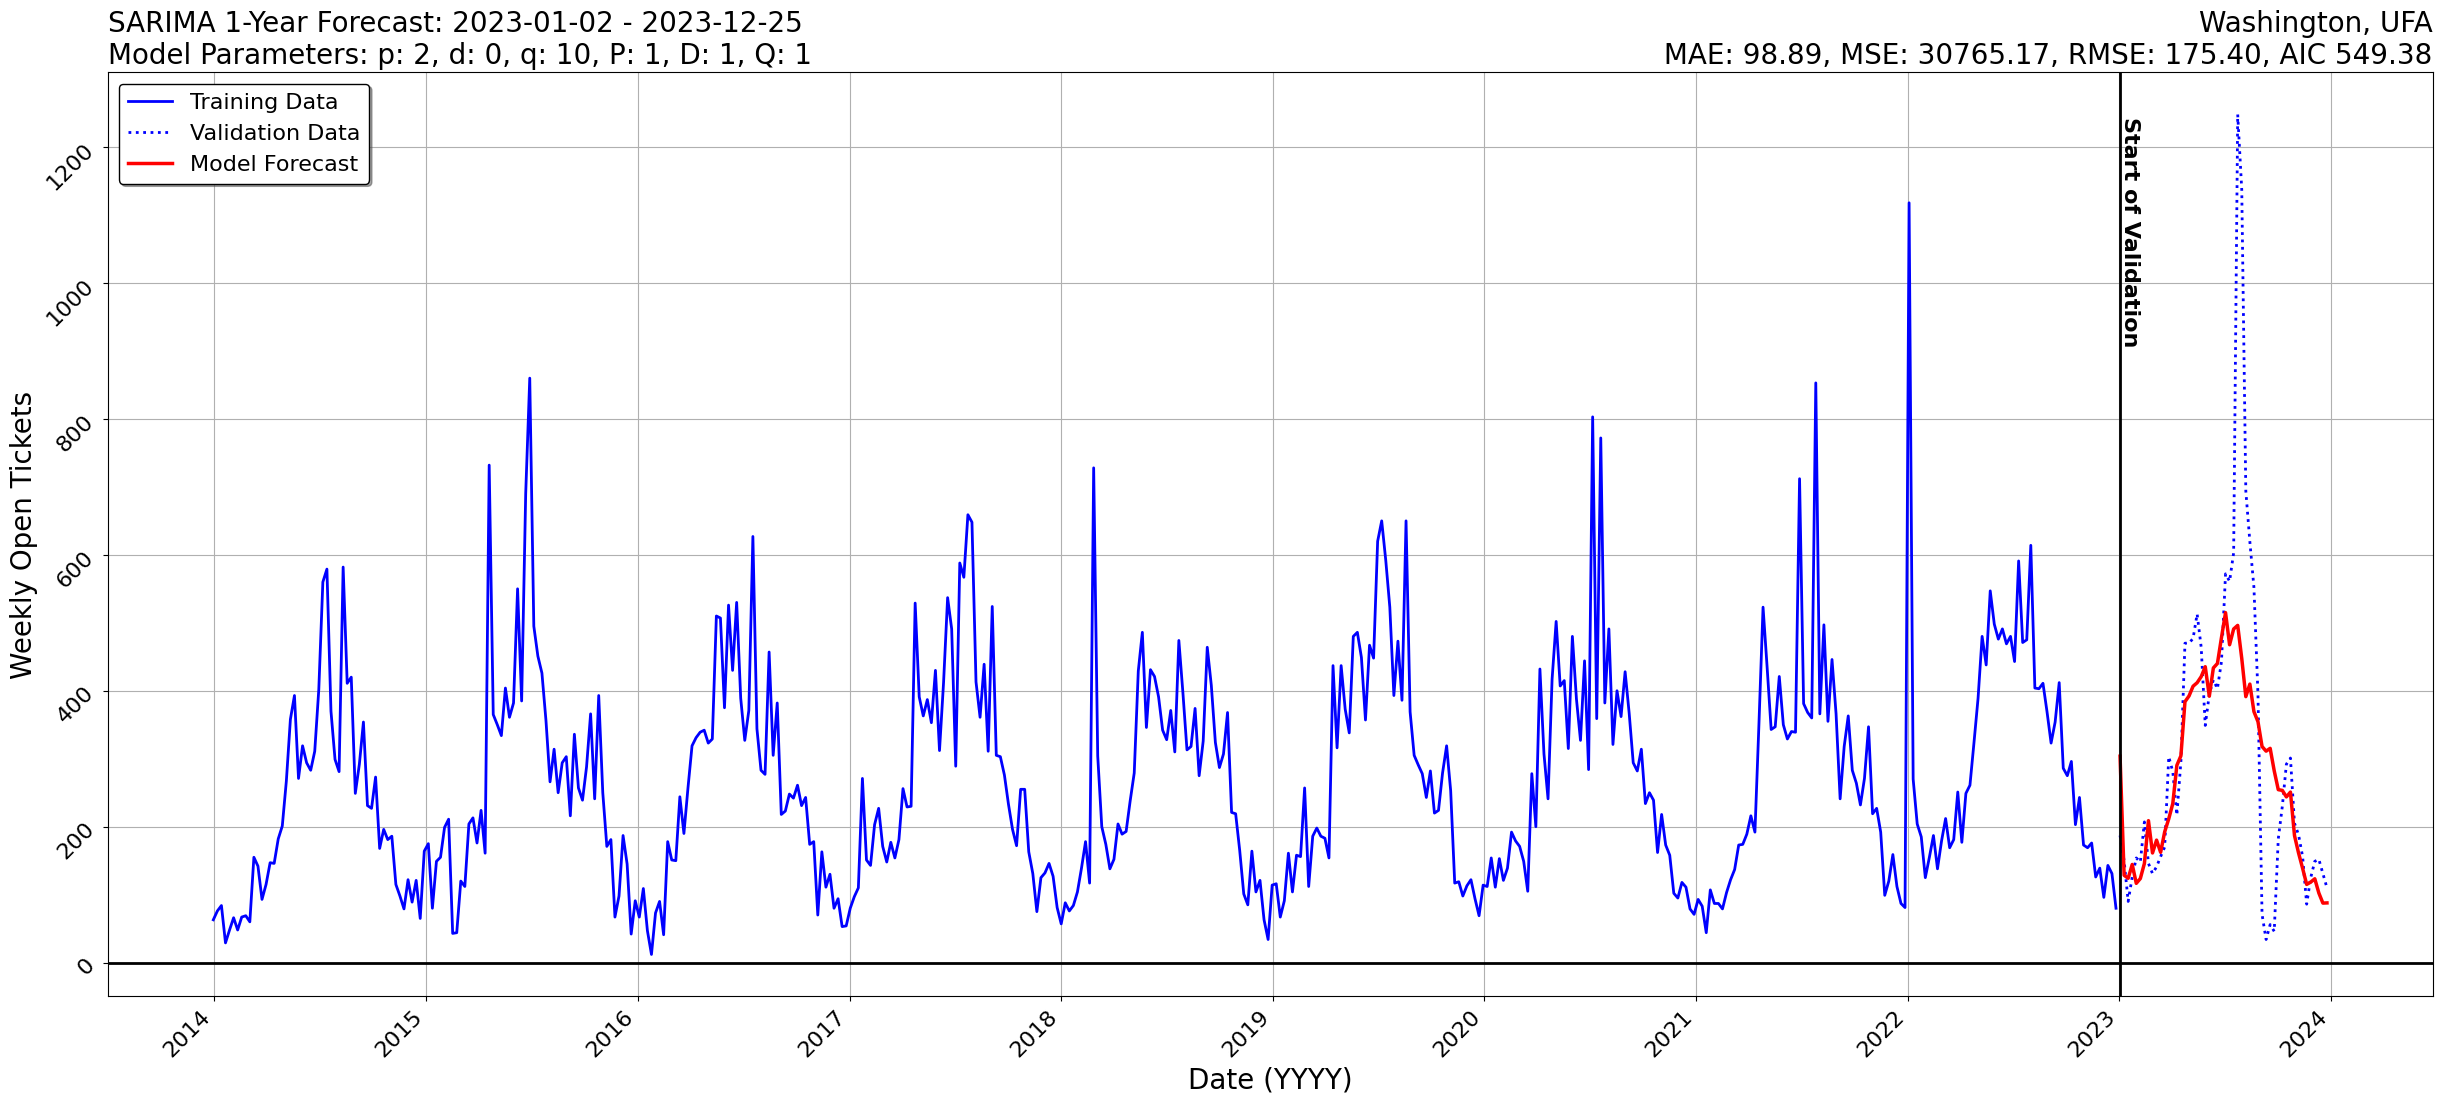

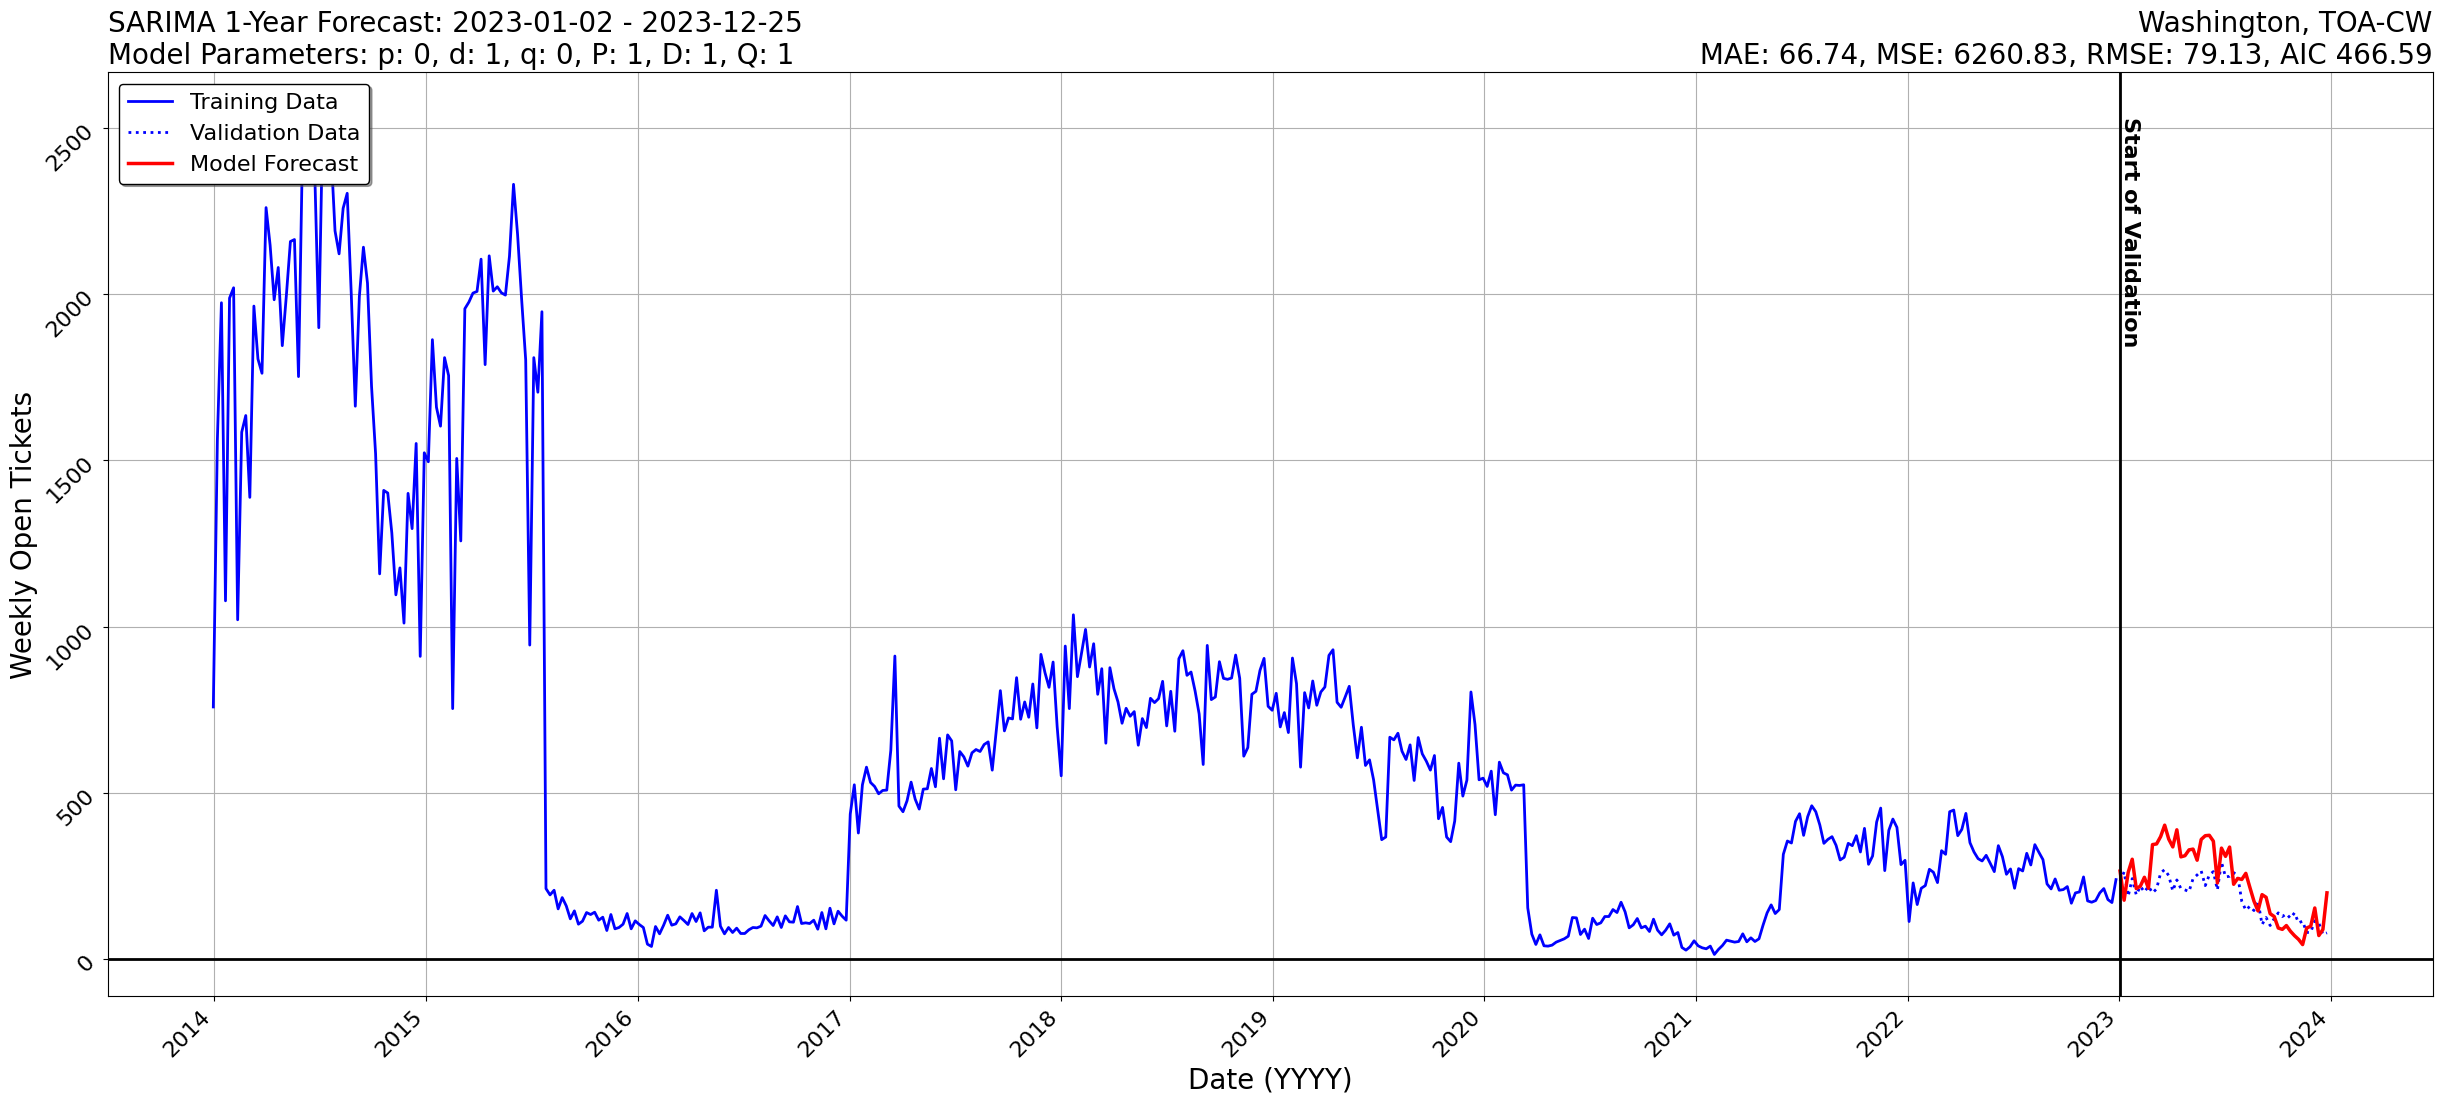

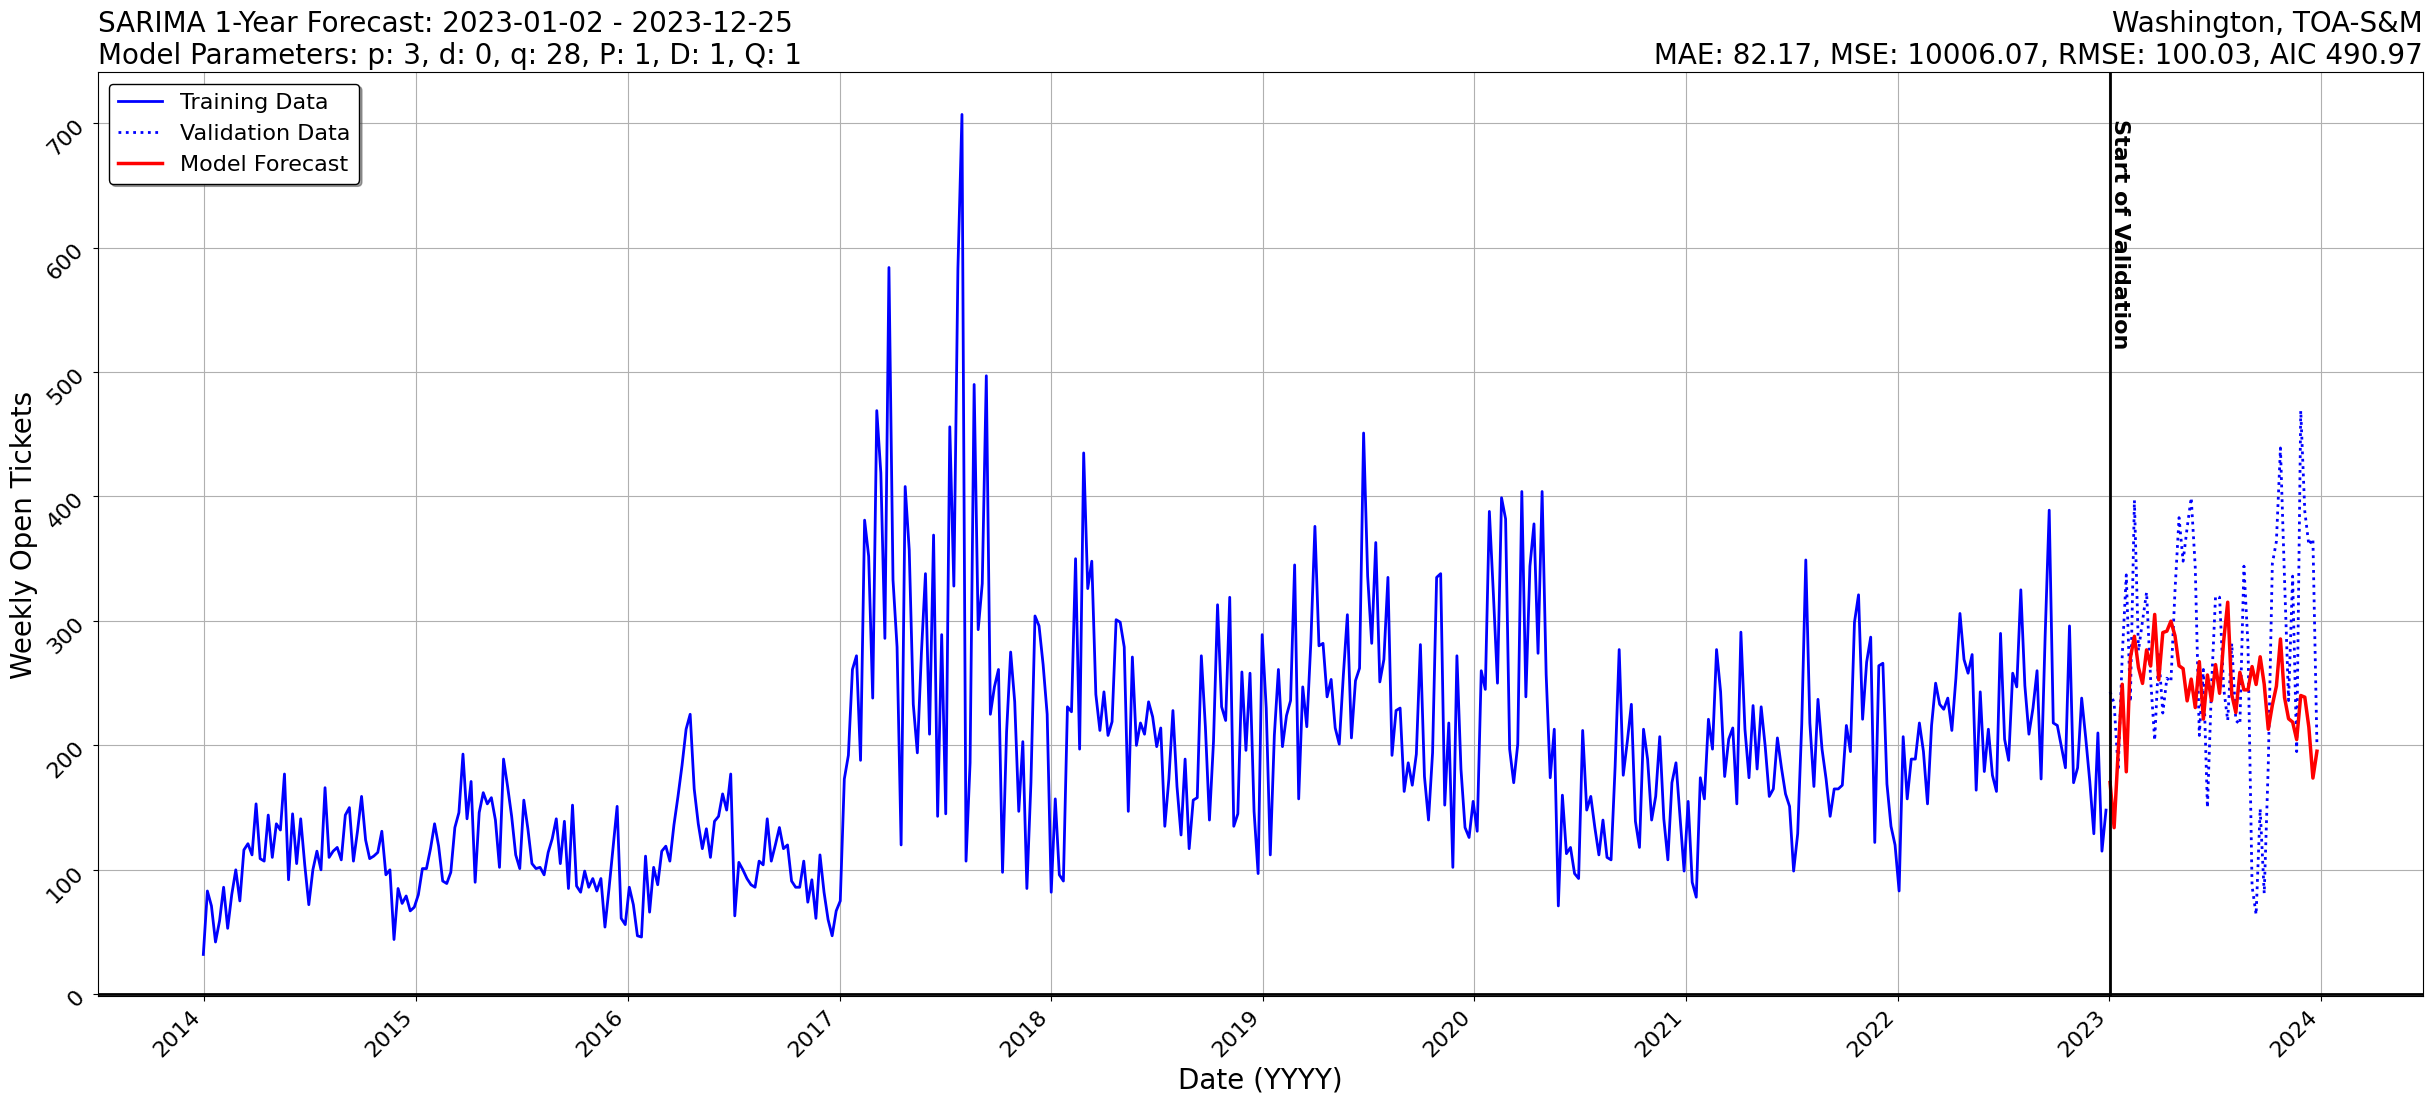

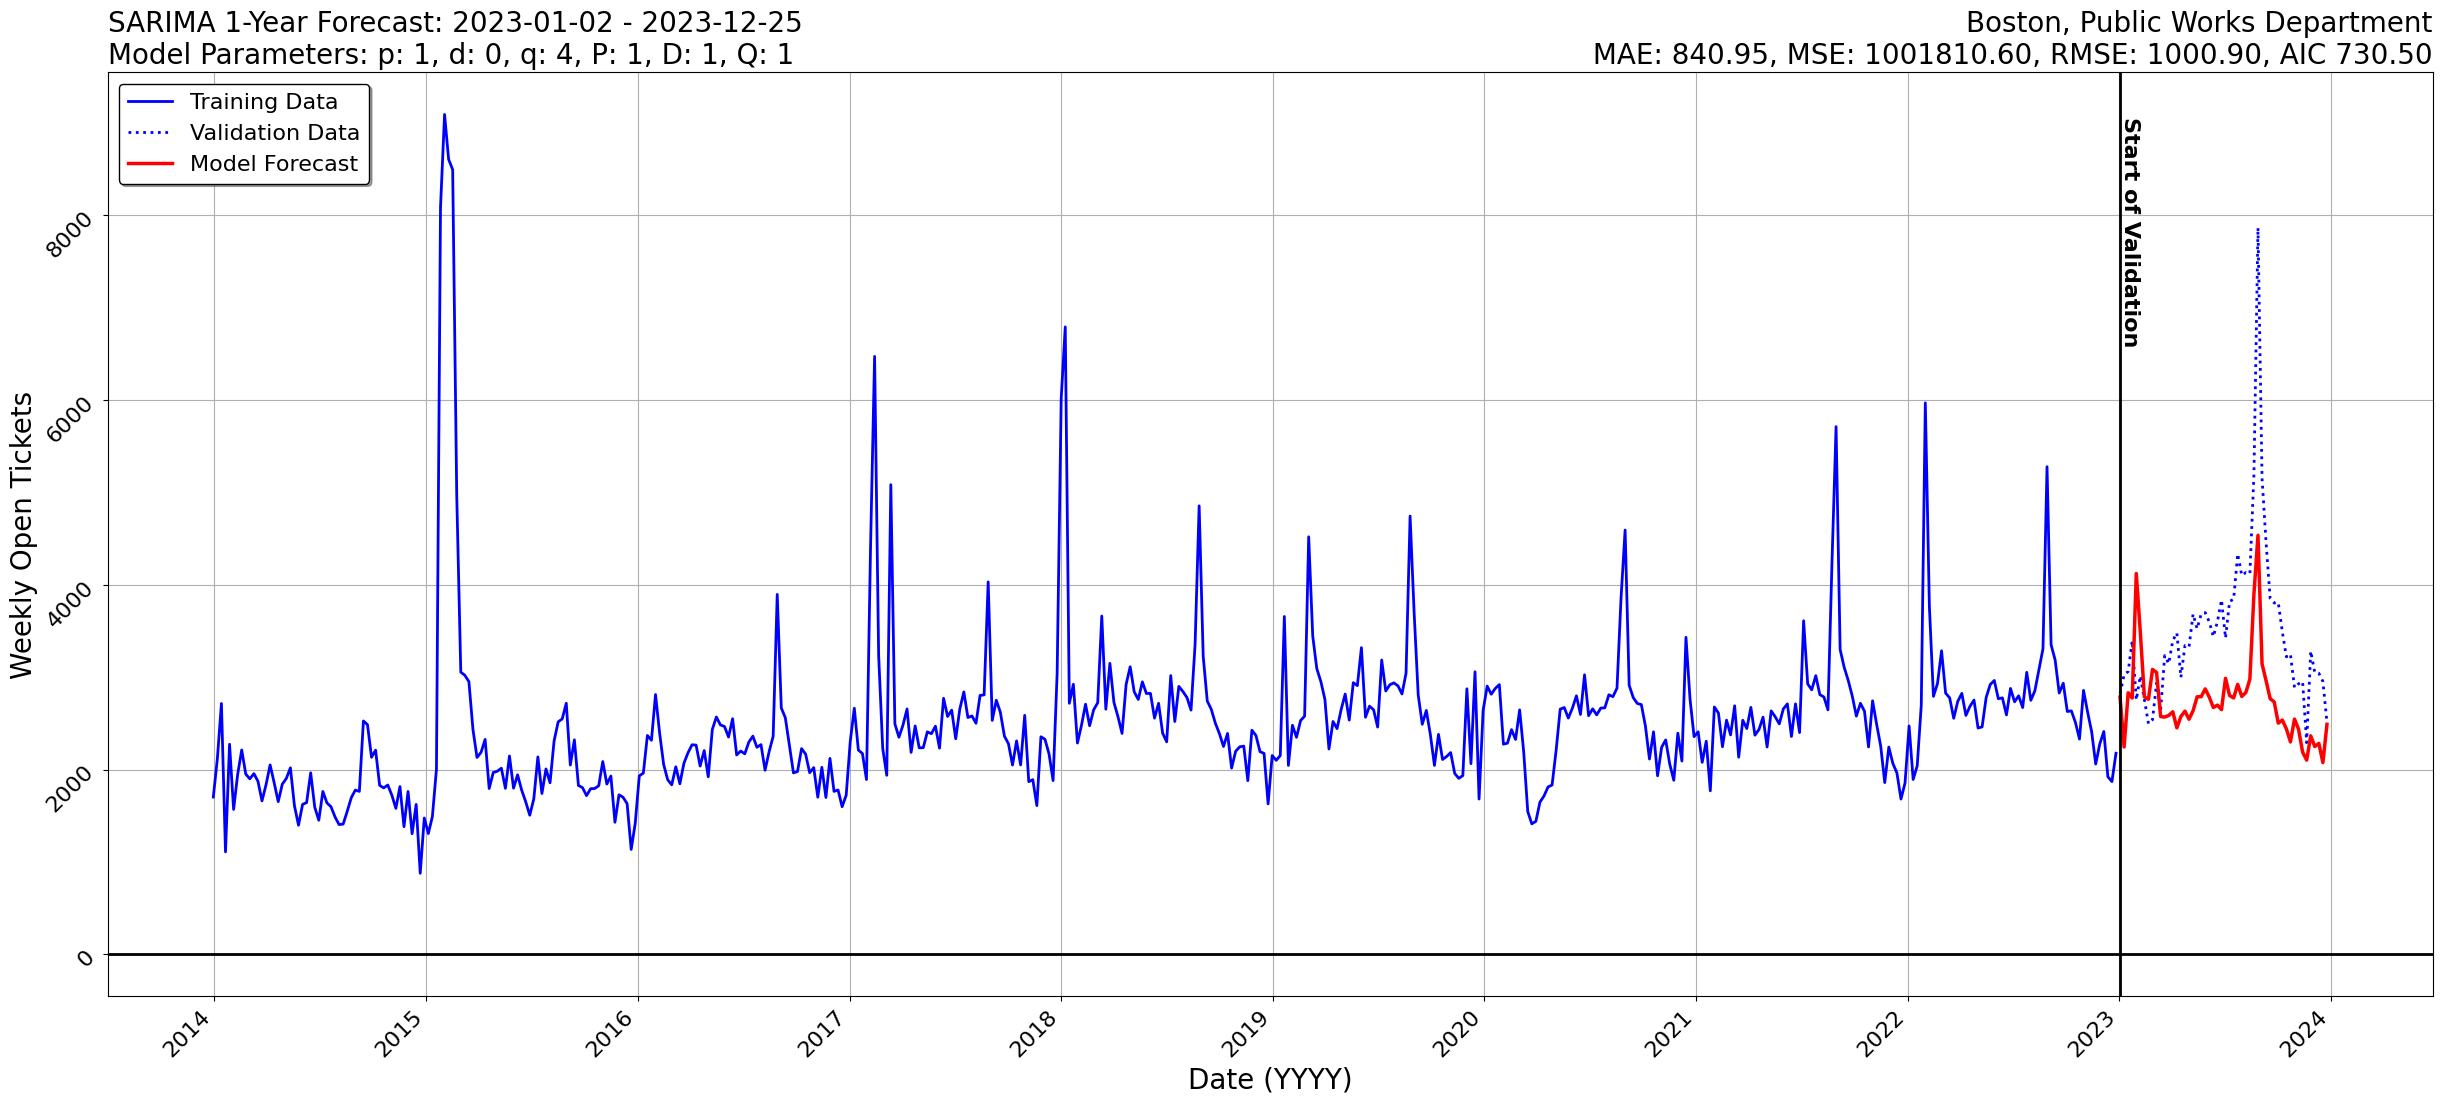

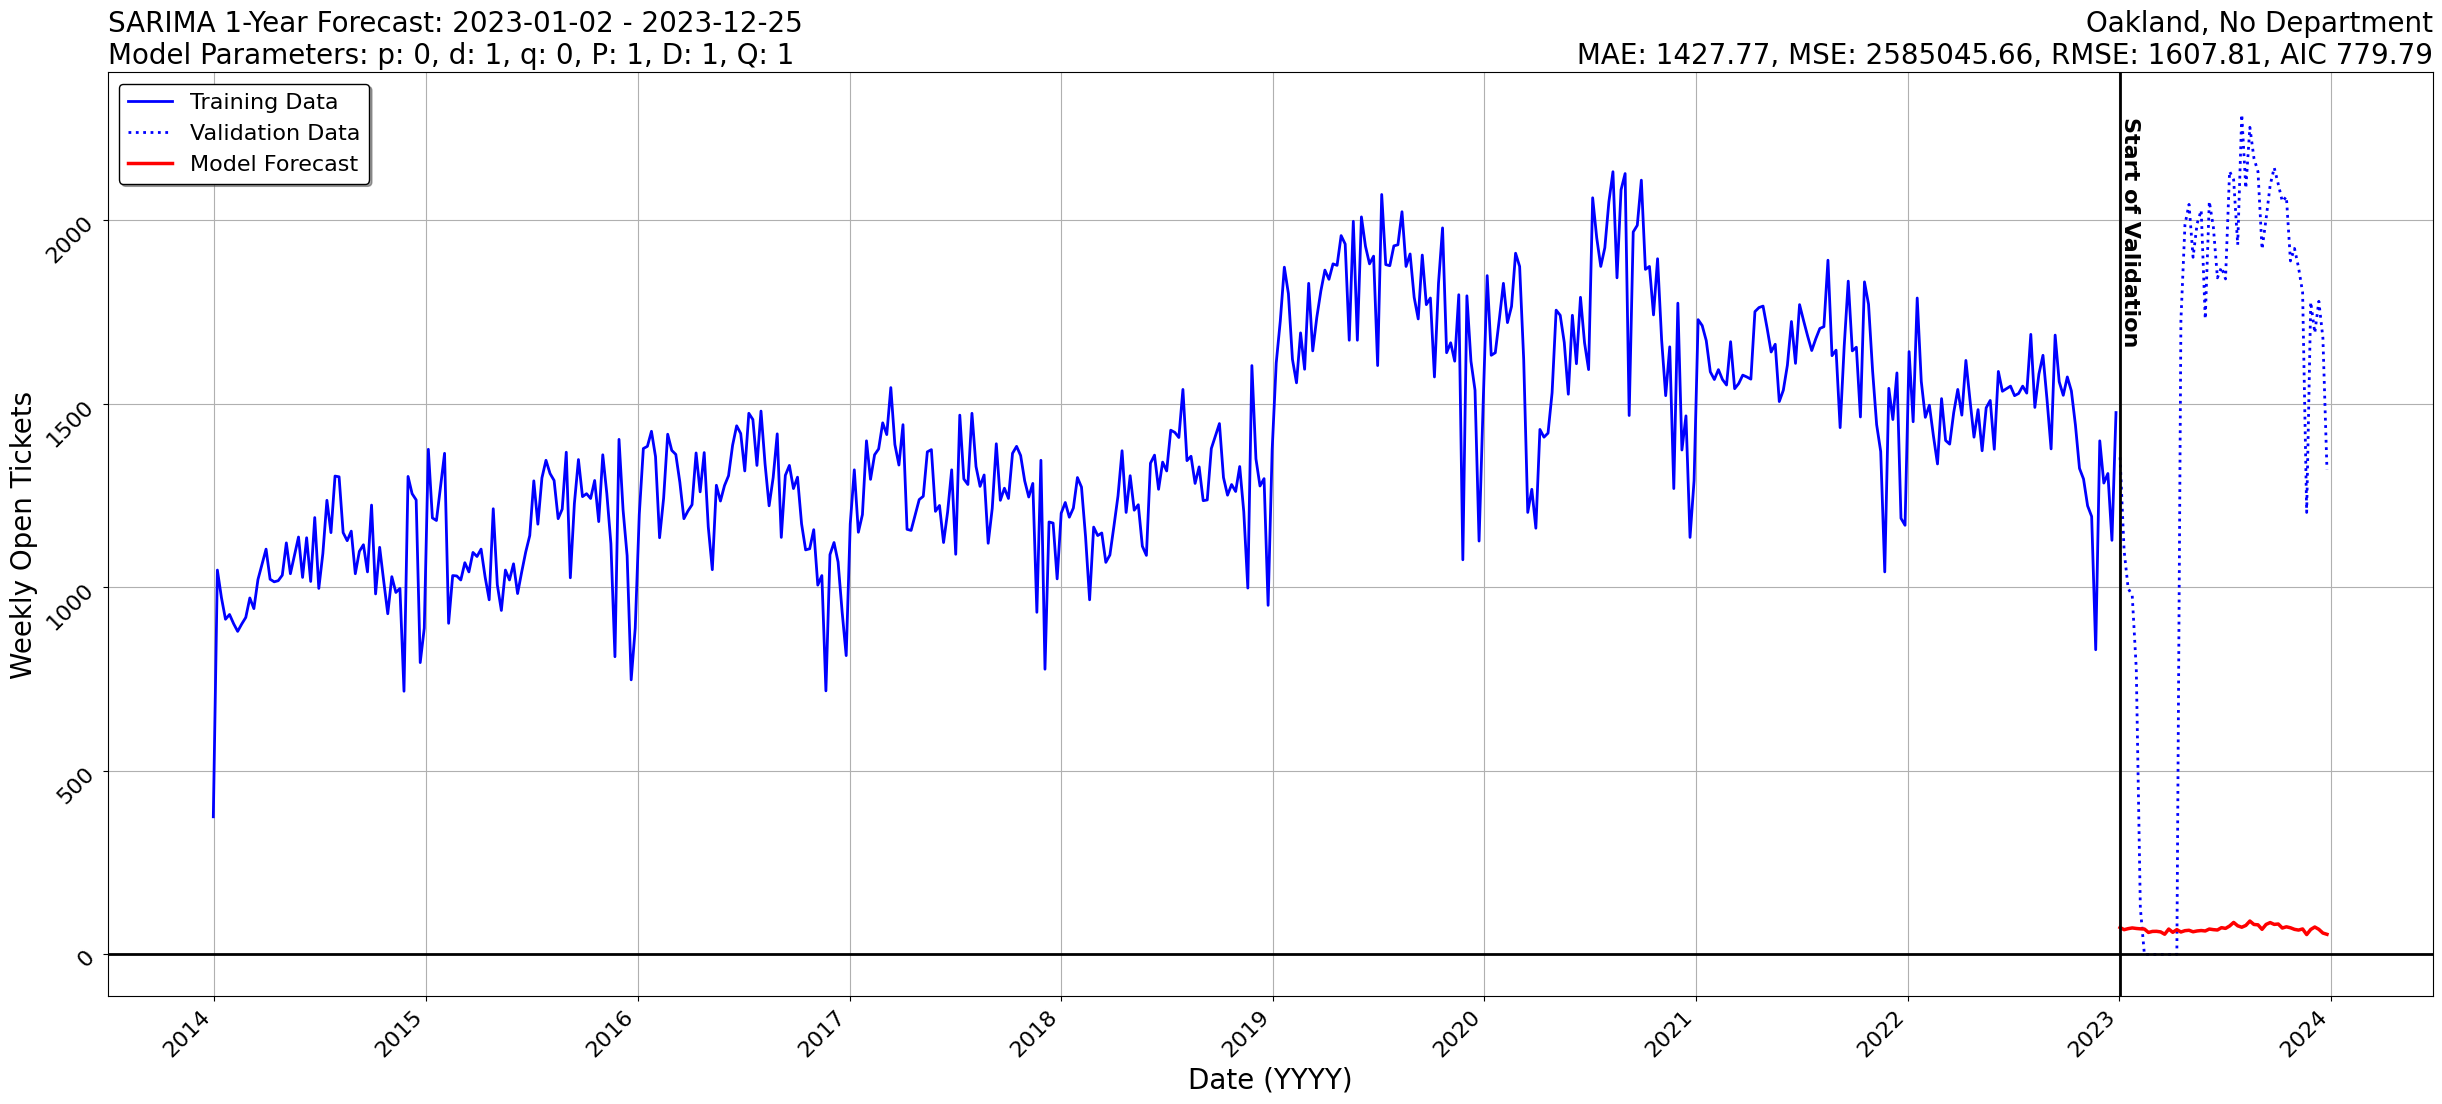

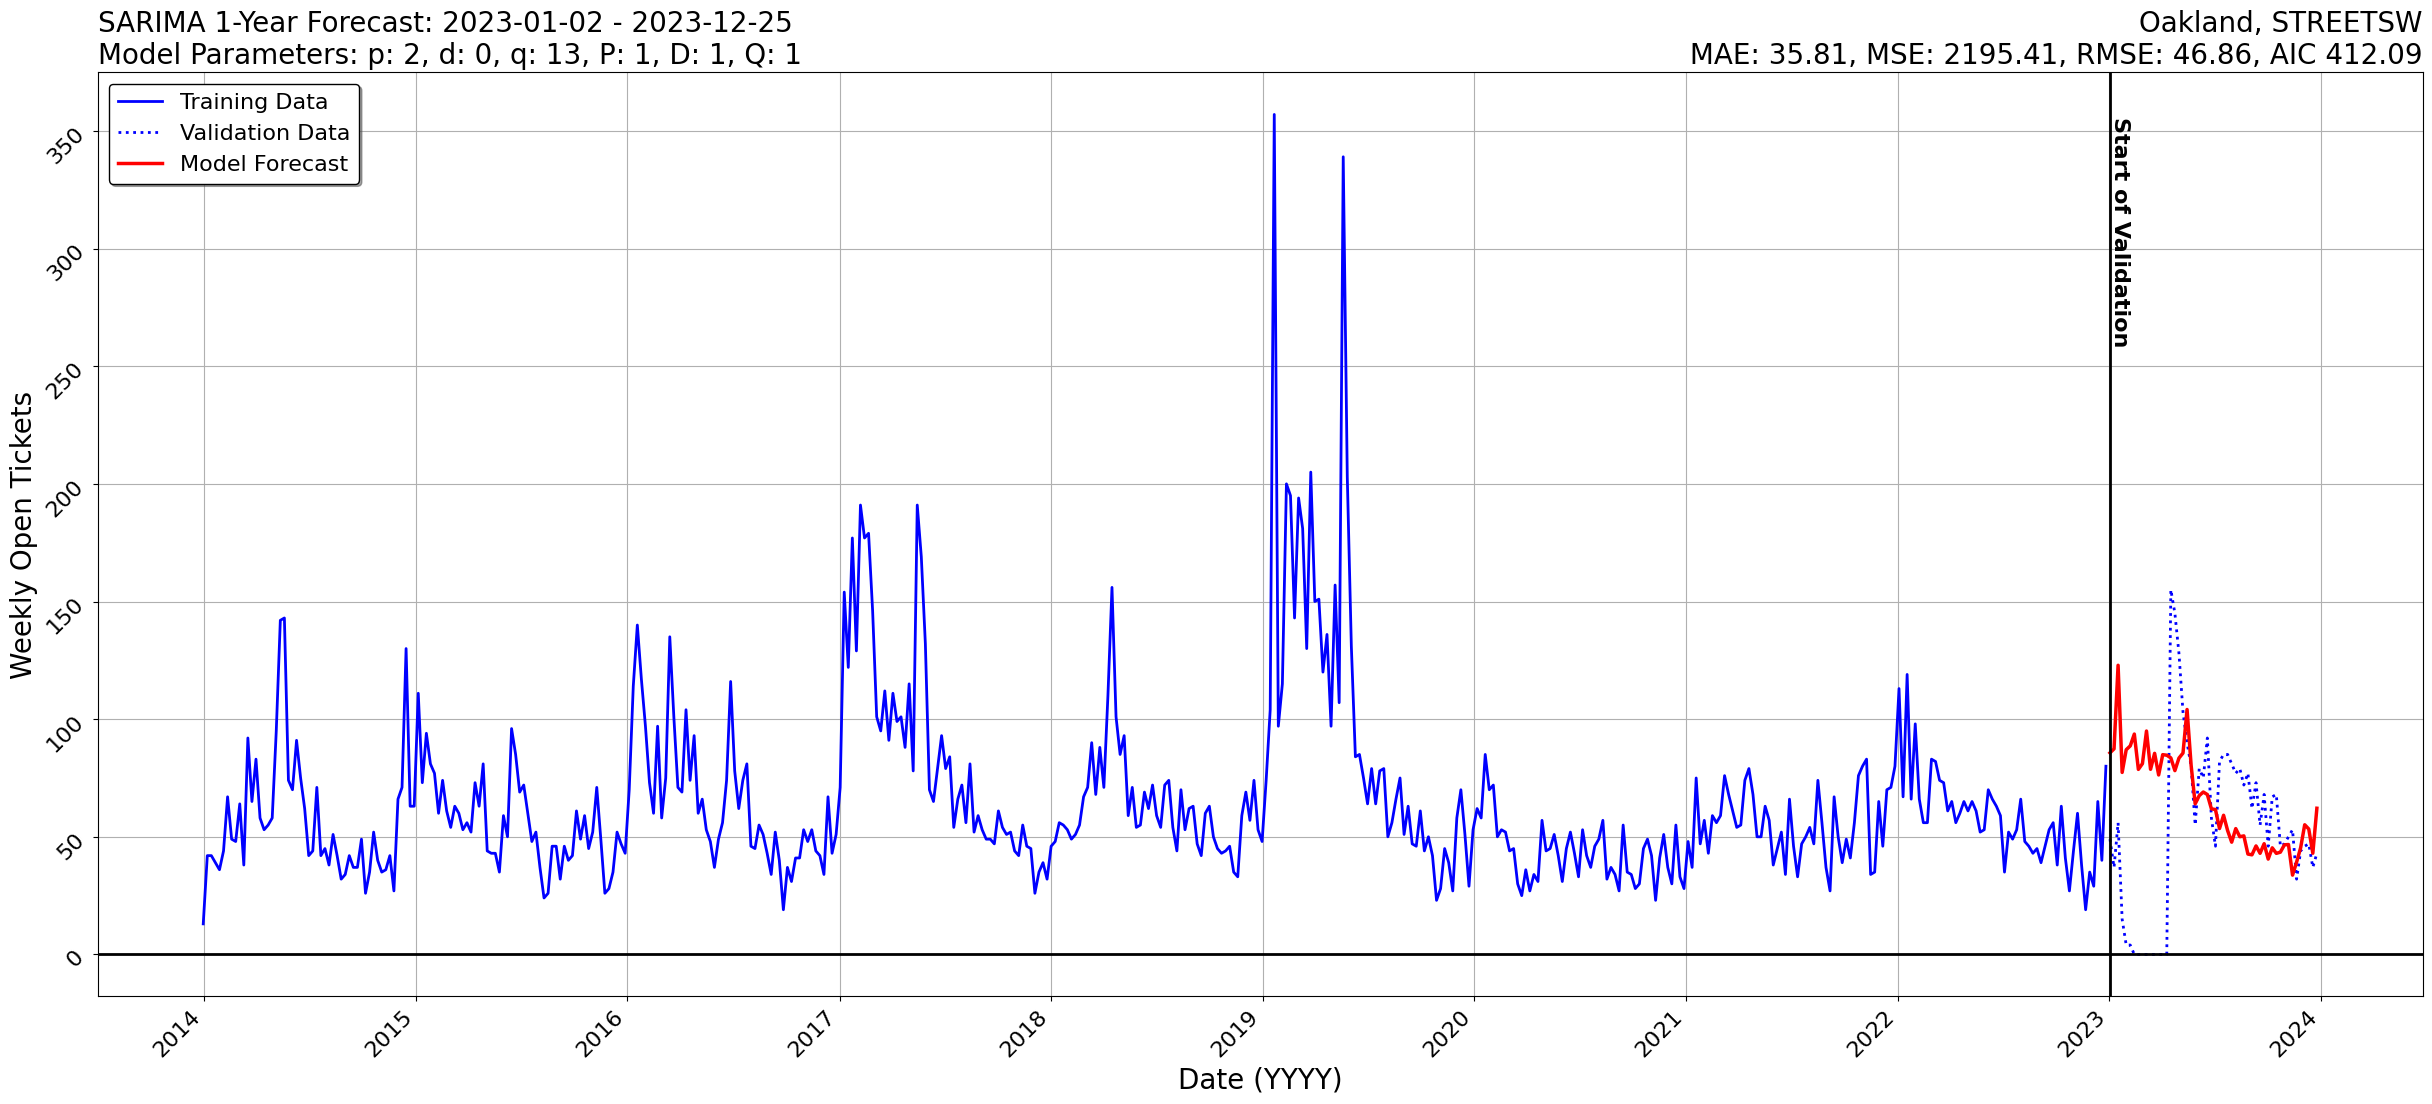

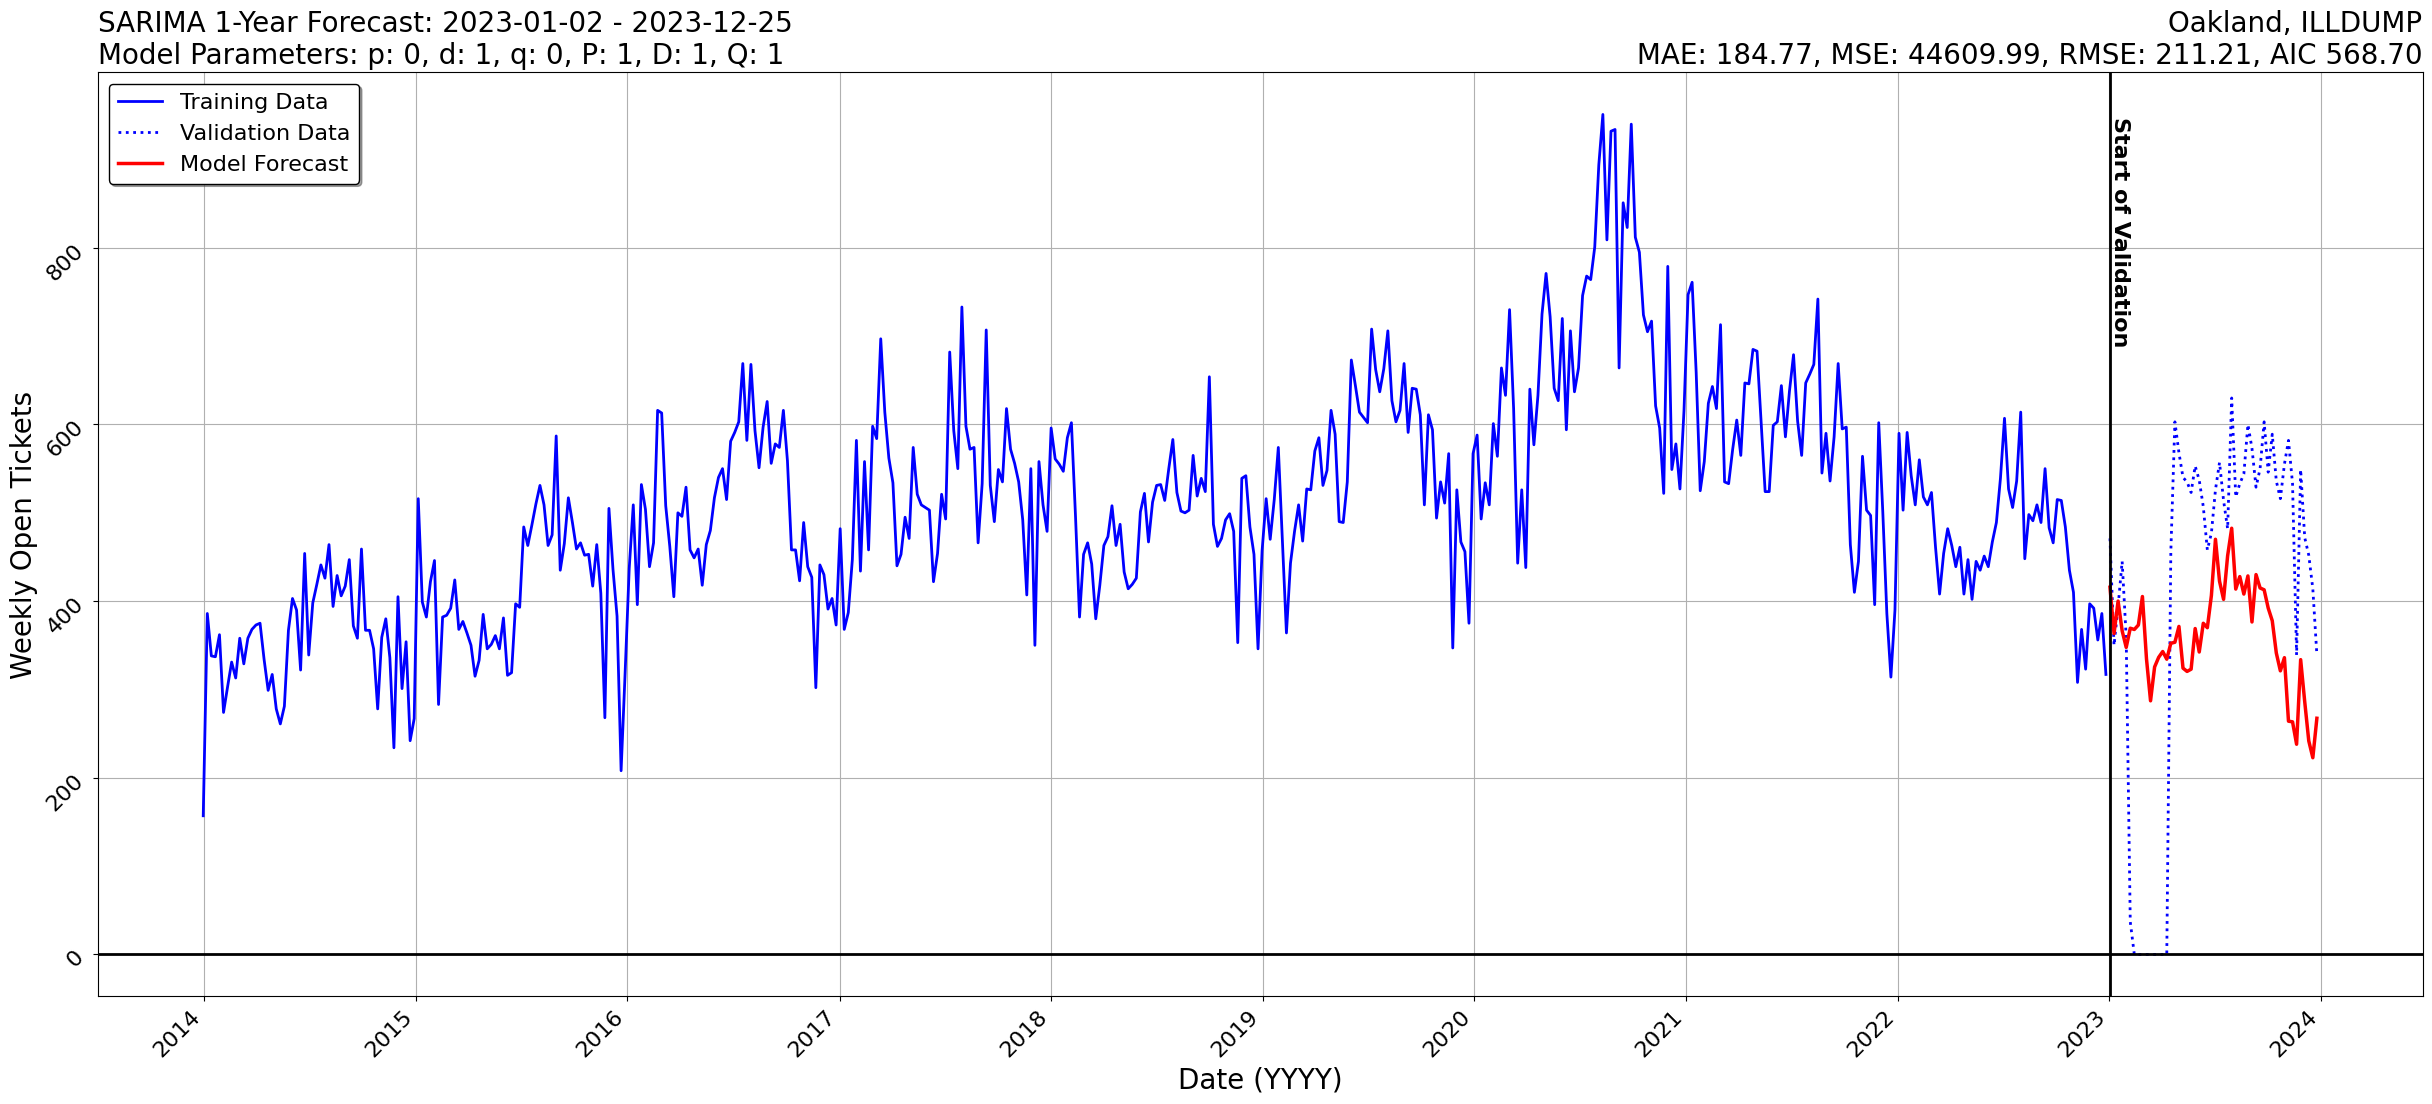

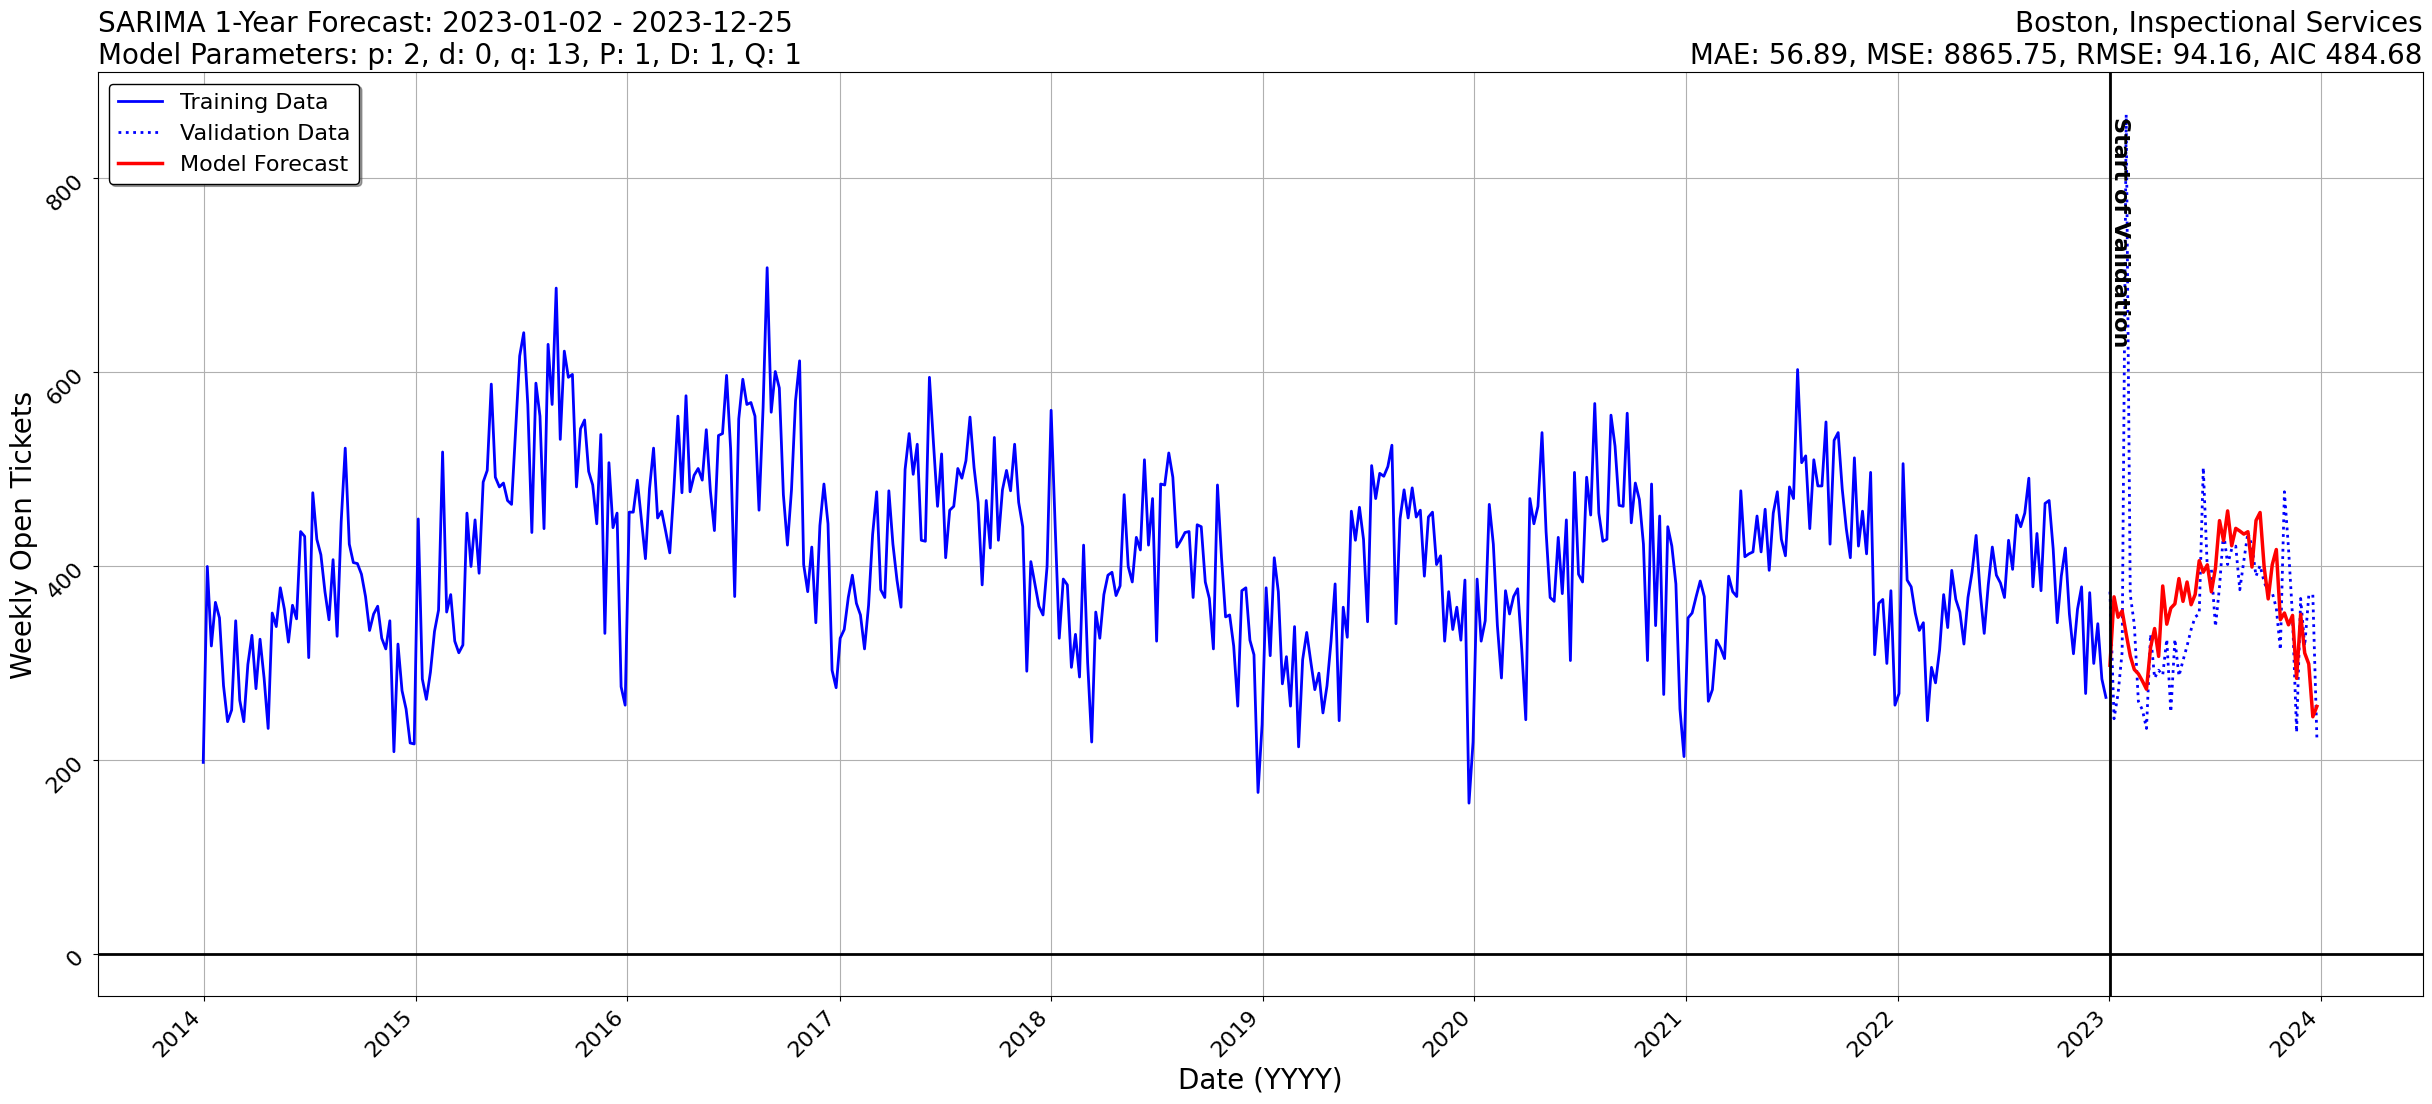

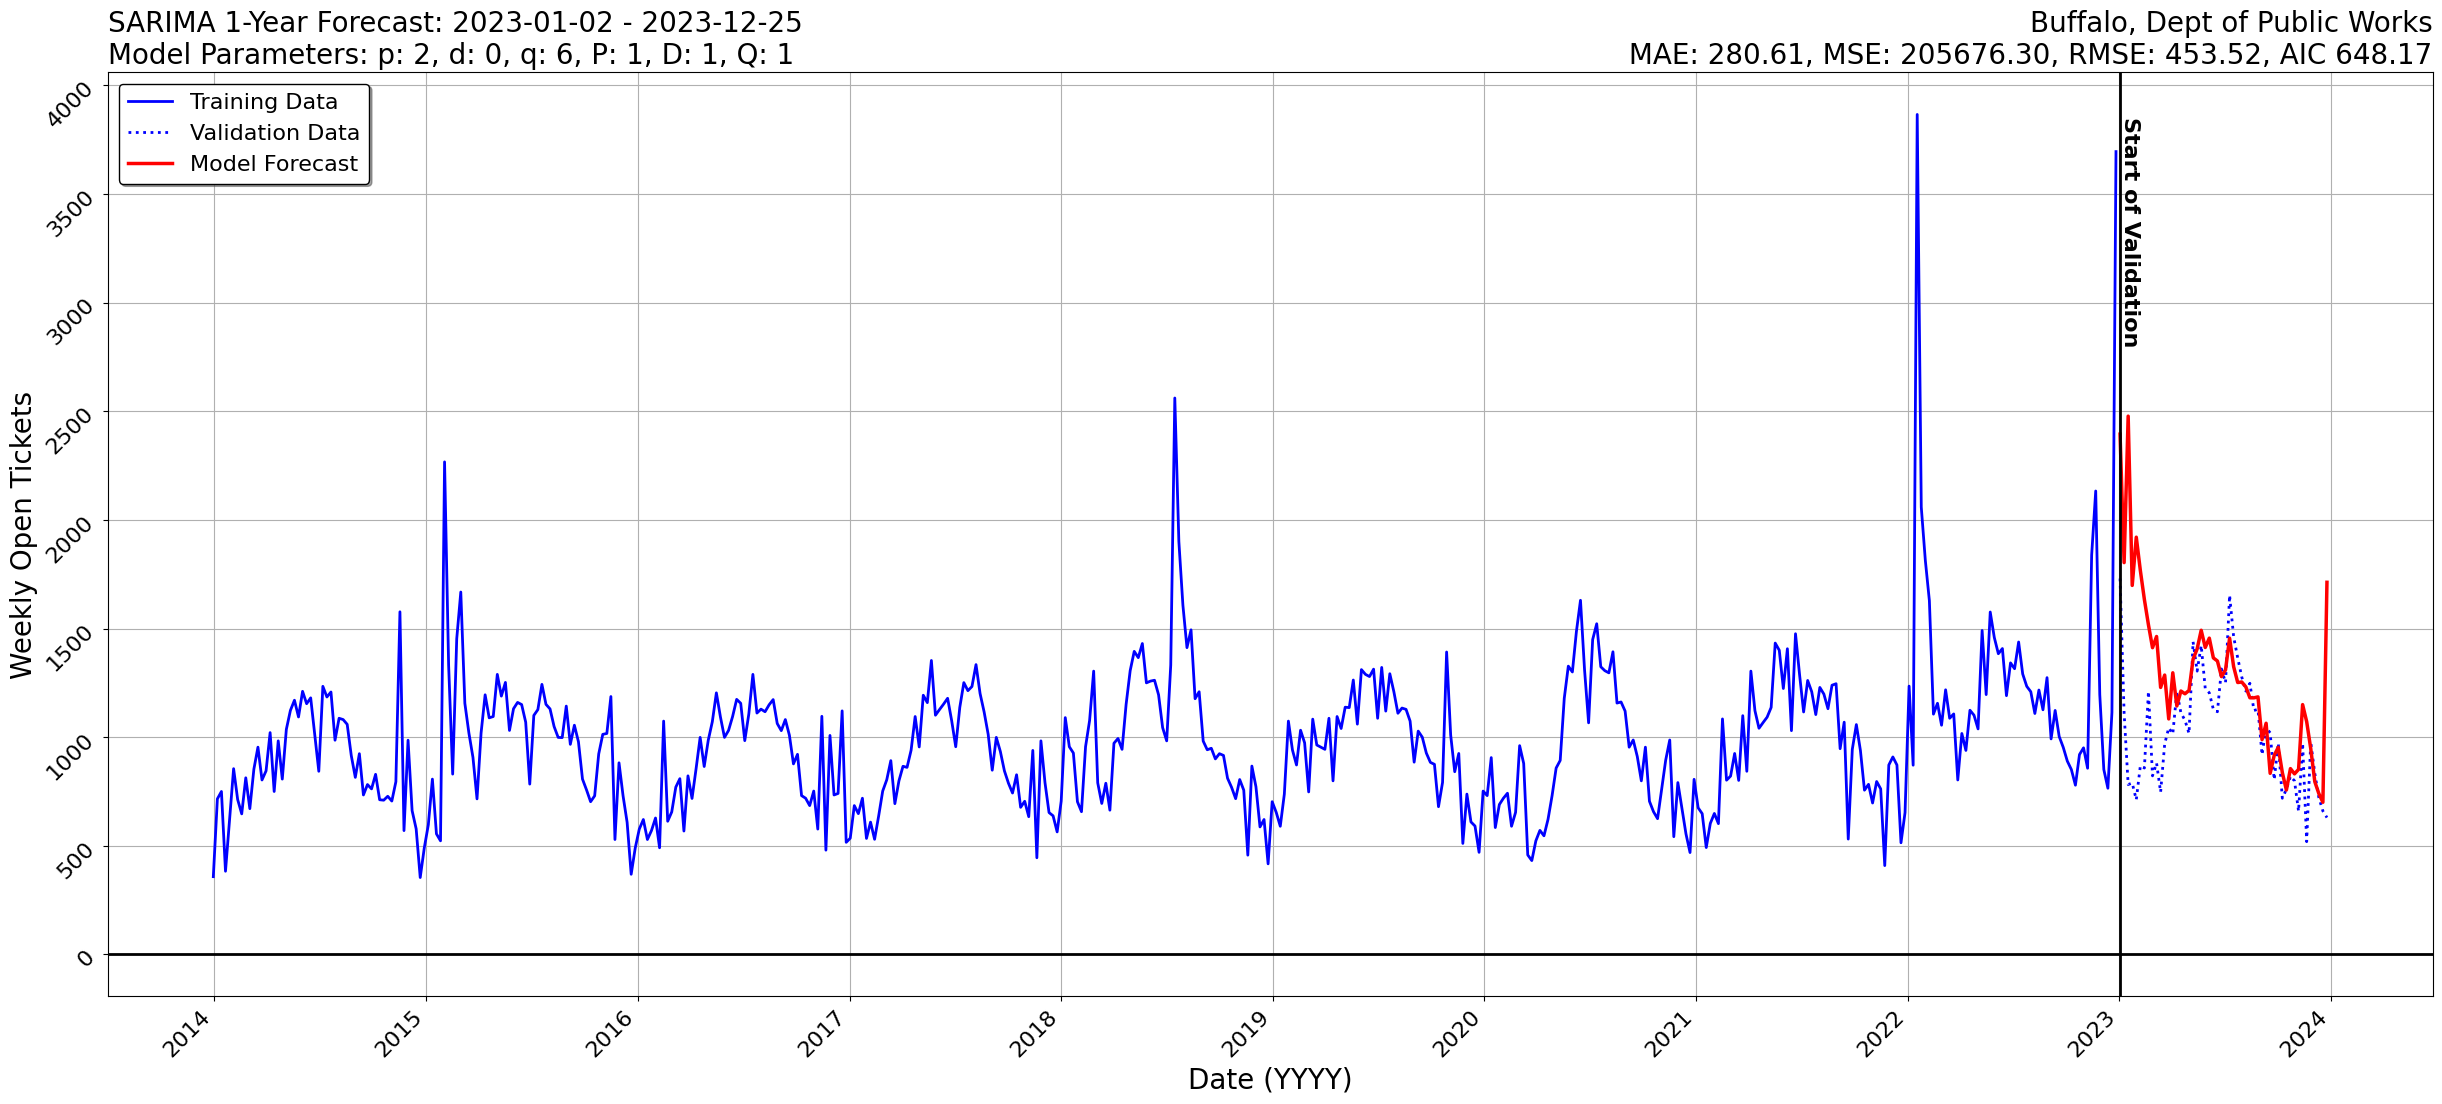

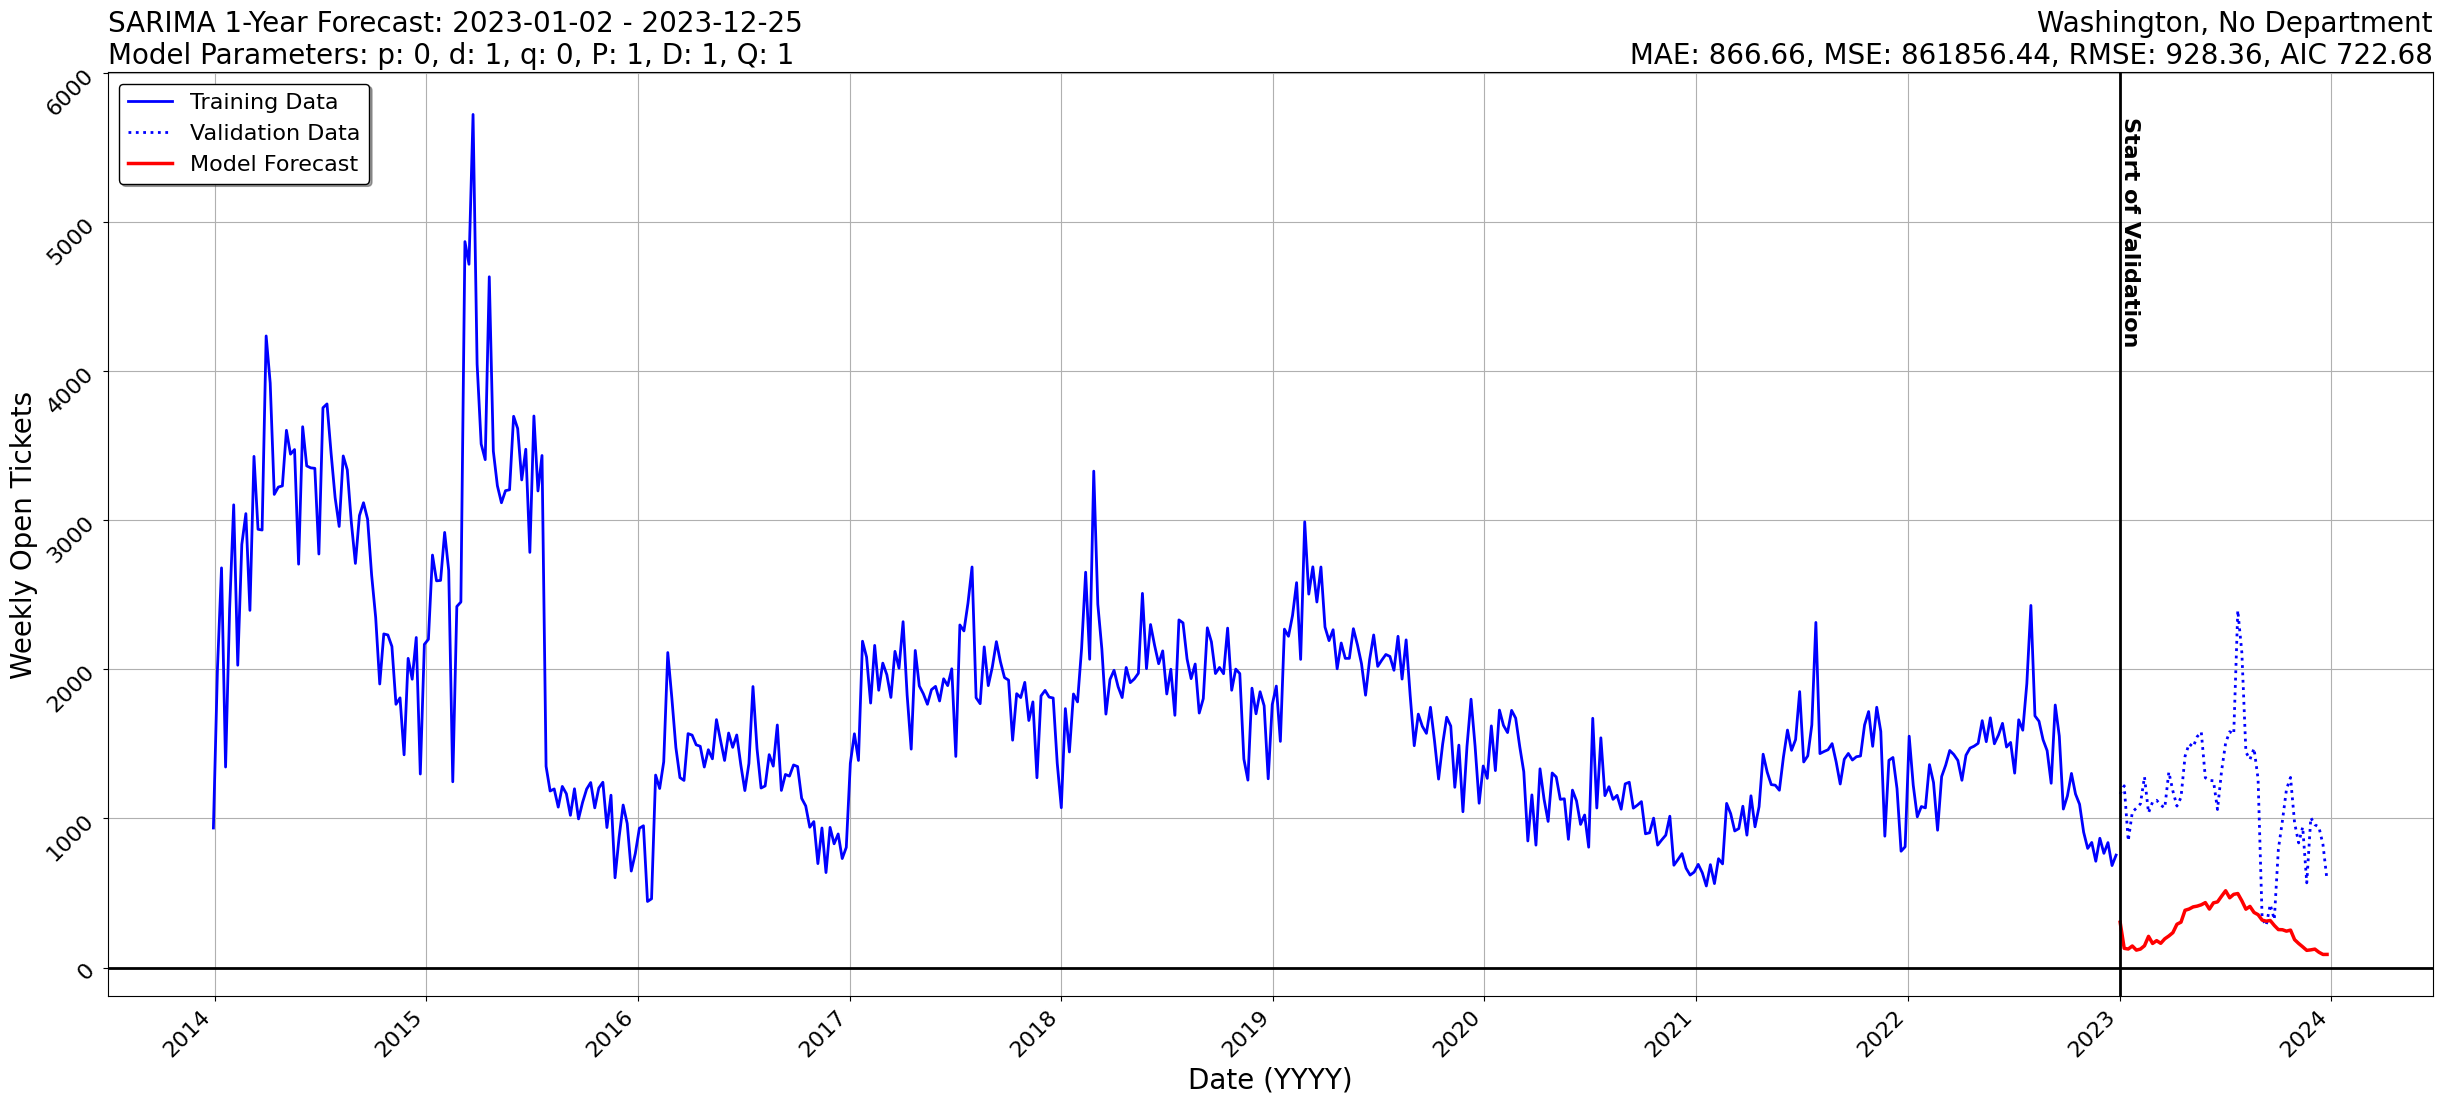

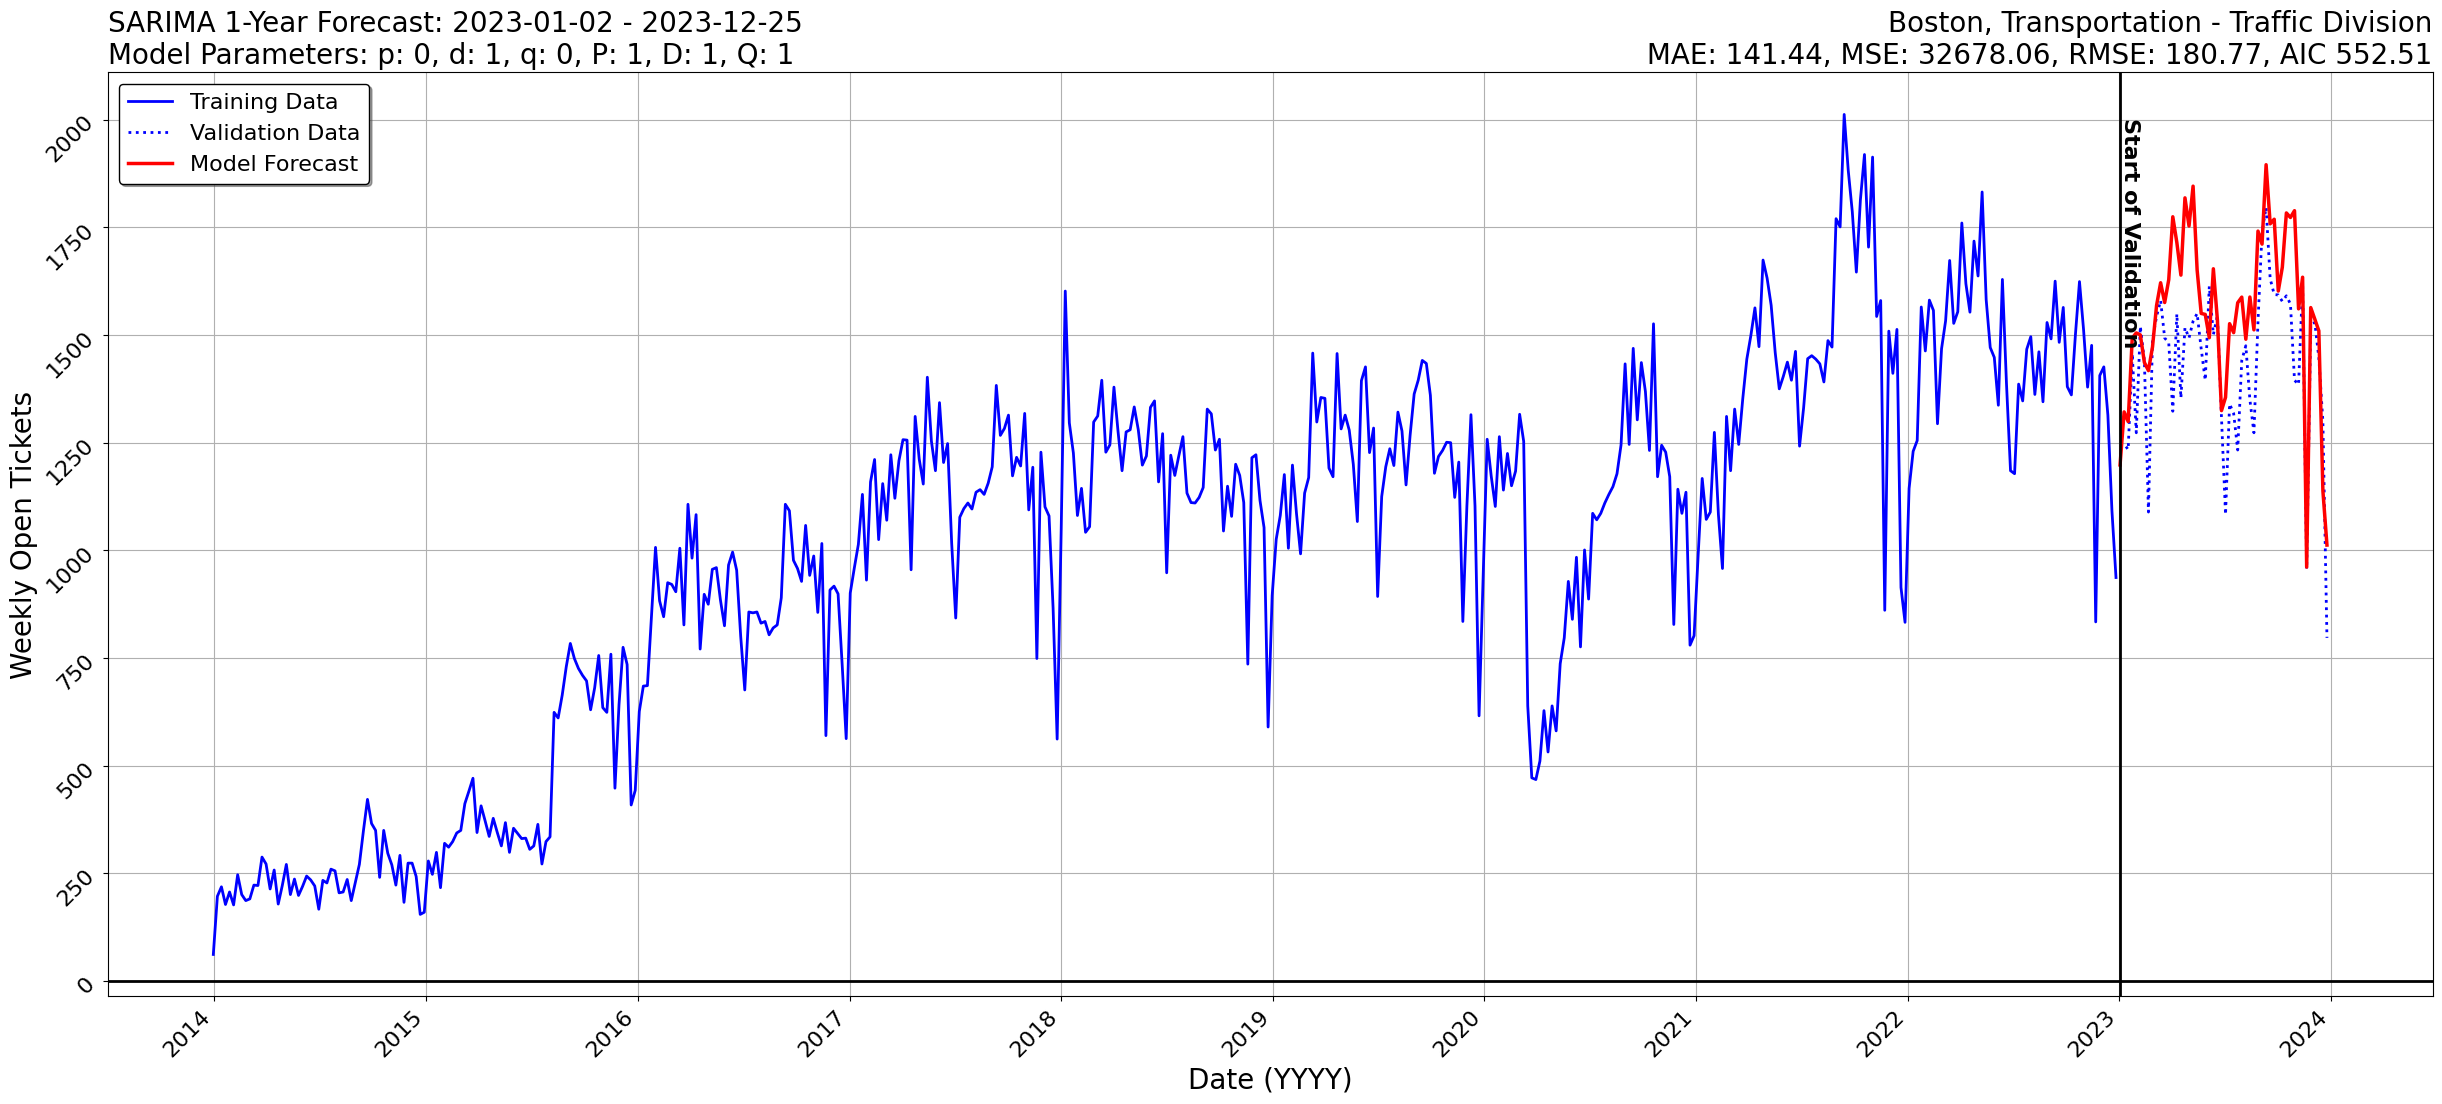

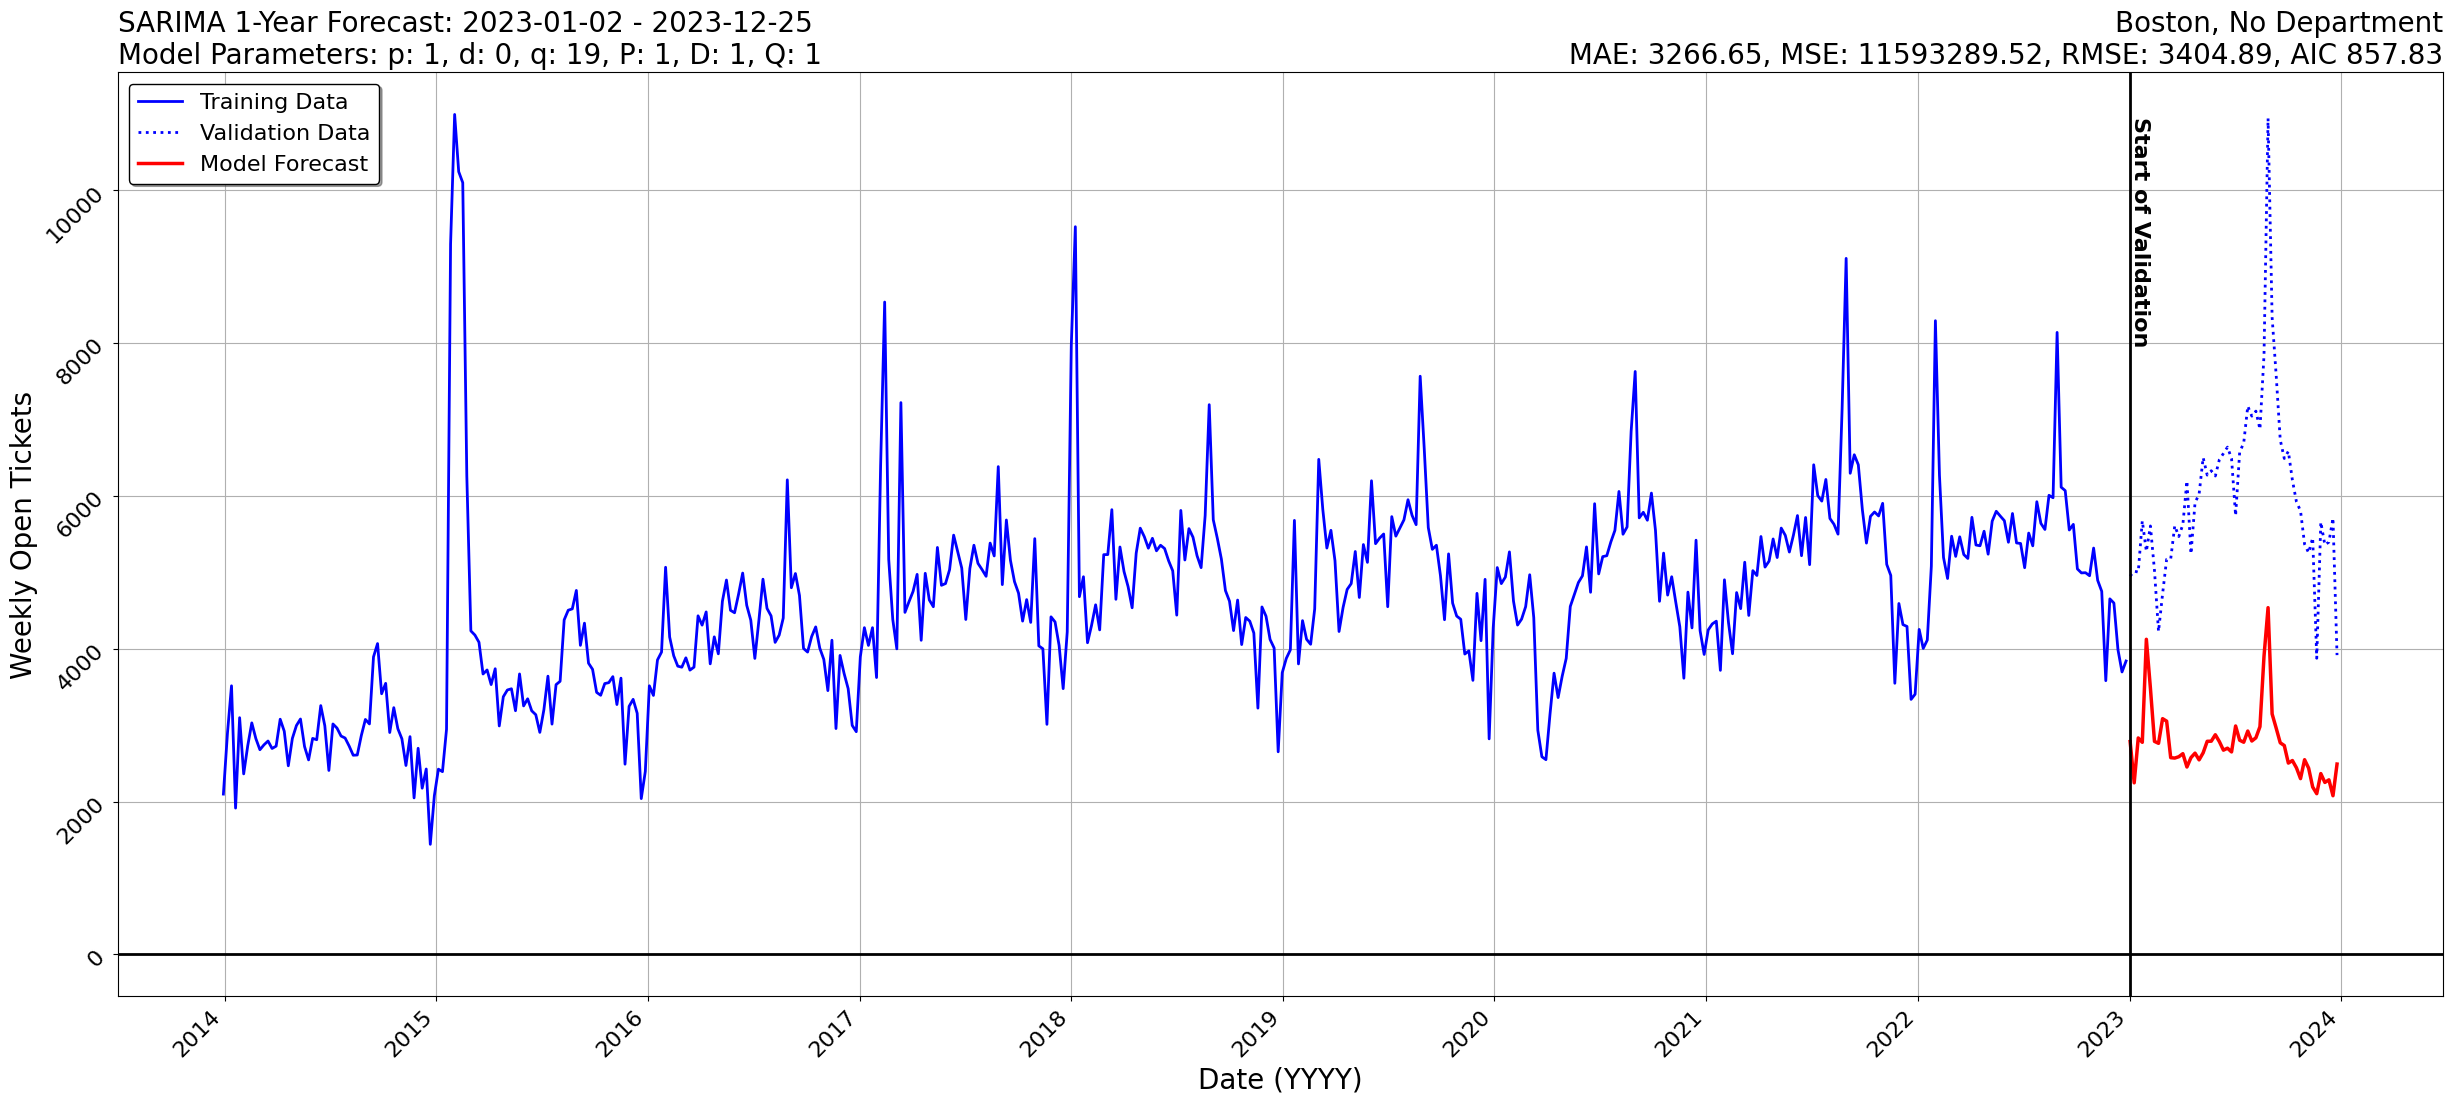

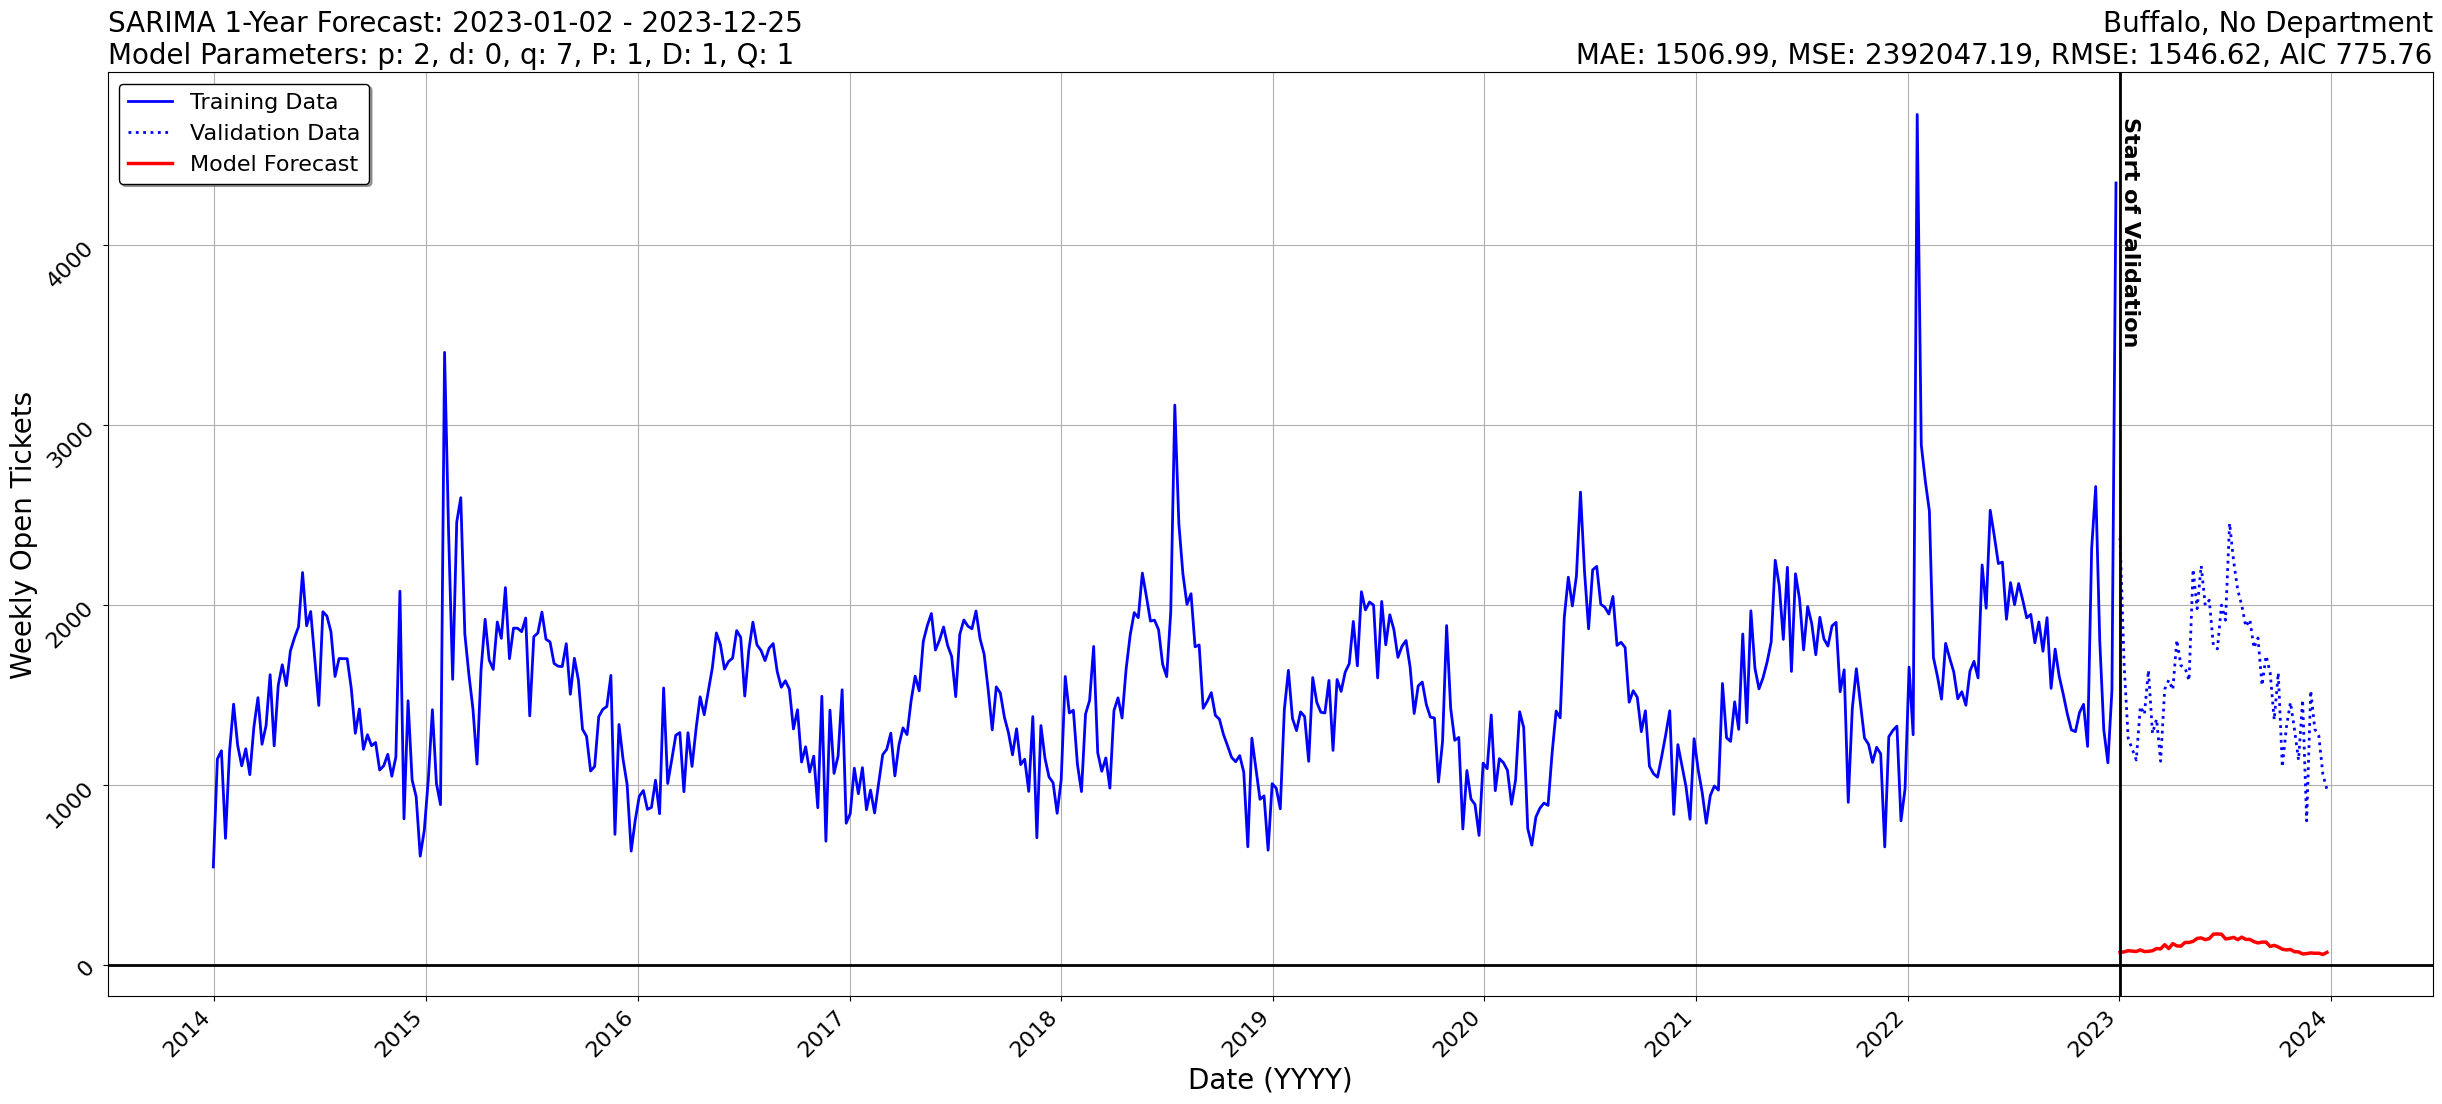

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set the default size for plots
plt.rcParams['figure.figsize'] = (30.0, 12.0)

def calculate_aic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    rss = np.sum(resid ** 2)  # Residual sum of squares
    n = len(y_true)  # Number of observations
    aic = n * np.log(rss / n) + 2 * num_params  # AIC formula
    return aic

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))  # Calculate RMSE

def plot_train_test_data(model_names, legend_font=14, title_font=20, label_font=16):
    # Function to plot training, test, and prediction data for different models
    for model_name in model_names:
        # Split the model name to extract details
        model_name_split = model_name.split('_')
        if len(model_name_split) > 1:
            model_name_used = model_name_split[0]  # Use the first part if split results in more than one part
            model_name_none = model_name_split[1]  # Second part (often department name)
        else:
            model_name_used = model_name  # Use the entire model name if split results in only one part
            model_name_none = 'No Department'

        # Use glob to find corresponding files in directories
        train_file = glob(os.path.join('../data/out/', f'*{model_name}_train*.csv'))[0]
        test_file = glob(os.path.join('../data/out/', f'*{model_name}_test*.csv'))[0]
        pred_file = glob(os.path.join('../data/predictions/', f'*sarimax_{model_name}*.csv'))[0]
        model_file = glob(os.path.join('../models/', 'hyperparameters.csv'))[0]

        # Load model hyperparameters
        model_data = pd.read_csv(model_file)
        model_params = model_data[model_data['model_name'] == model_name]
        p, d, q, P, D, Q = model_params[['p', 'd', 'q', 'P', 'D', 'Q']].values[0]

        # Load training, test, and prediction data
        train_data = pd.read_csv(train_file)
        train_data['week_start'] = pd.to_datetime(train_data['week_start'])
        test_data = pd.read_csv(test_file)
        test_data['week_start'] = pd.to_datetime(test_data['week_start'])
        pred_data = pd.read_csv(pred_file)
        pred_data['week_start'] = pd.to_datetime(pred_data['week_start'])

        # Formatting date range for title
        start_date = pred_data.week_start.iloc[0].strftime('%Y-%m-%d')
        end_date = pred_data.week_start.iloc[-1].strftime('%Y-%m-%d')

        # Calculate error metrics
        mae = mean_absolute_error(test_data['count'], pred_data['y_pred'])
        mse = mean_squared_error(test_data['count'], pred_data['y_pred'])
        rmse = calculate_rmse(test_data['count'], pred_data['y_pred'])
        num_params = len(model_params.columns) - 1  # Exclude 'model_name' column
        aic = calculate_aic(test_data['count'], pred_data['y_pred'], num_params)

        # Plot data
        plt.plot(train_data['week_start'], train_data['count'], label='Training Data', c='b', linewidth=2)
        plt.plot(test_data['week_start'], test_data['count'], label='Validation Data', c='b', linestyle=':', linewidth=2)
        plt.plot(pred_data['week_start'], pred_data['y_pred'], label='Model Forecast', c='r', linewidth=2.5)

        # Vertical line to indicate start of validation data
        plt.axvline(x=pred_data['week_start'].iloc[0], c='k', linewidth=2)
        plt.axhline(y=0, c='k', linewidth=2)
        plt.text(pred_data['week_start'].iloc[0], plt.ylim()[1]*0.95, 'Start of Validation', rotation=270, verticalalignment='top', color='k', fontweight='heavy', fontsize=16)

        # Titles and labels
        plt.title(f'SARIMA 1-Year Forecast: {start_date} - {end_date}\nModel Parameters: p: {p}, d: {d}, q: {q}, P: {P}, D: {D}, Q: {Q}', fontsize=title_font, fontweight='normal', loc='left')
        plt.title(f'{model_name_used.capitalize()}, {model_name_none}\n MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, AIC {aic:.2f}', fontsize=title_font, fontweight='normal', loc='right')
        plt.xlabel('Date (YYYY)', fontsize=label_font + 4)
        plt.ylabel('Weekly Open Tickets', fontsize=label_font + 4)
        plt.xticks(rotation=45, ha='right', fontsize=label_font)
        plt.yticks(rotation=45, ha='right', fontsize=label_font)

        # Display legend and grid
        plt.legend(loc='upper left', frameon=True, fontsize=legend_font + 2, shadow=True, edgecolor='black')
        plt.grid(True)
        plt.show()

# Example usage:
model_names = [
    'buffalo_Buffalo Police Department',
    'oakland_PARKING',
    'buffalo_DPIS',
    'washington_UFA',
    'washington_TOA-CW',
    'washington_TOA-S&M',
    'boston_Public Works Department',
    'oakland',
    'oakland_STREETSW',
    'oakland_ILLDUMP',
    'boston_Inspectional Services',
    'buffalo_Dept of Public Works',
    'washington',
    'boston_Transportation - Traffic Division',
    'boston',
    'buffalo']
plot_train_test_data(model_names)
